In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import spacy 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import tensorflow.compat.v1 as tf_compat


tf_compat.logging.set_verbosity(tf_compat.logging.ERROR)




#  Here I'll explore the data in general, looking for NaNs, and duplicates, and checking what needs to be cleaned ##

In [3]:
import pandas as pd

# Read the CSV files into DataFrames
books_data = pd.read_csv(r"C:\Users\Tareq\Desktop\Ryareson\820 files\archive\books_data.csv")
books_rating = pd.read_csv(r"C:\Users\Tareq\Desktop\Ryareson\820 files\archive\Books_rating.csv")

In [4]:
books_data.head()


,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [2]:
books_rating.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [5]:
import pandas as pd
combined_data = pd.merge(books_data, books_rating, on="Title", how="inner")

In [6]:
combined_data.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount,Id,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN,1882931173,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,0826414346,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,0826414346,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,0826414346,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN,0826414346,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [6]:
# Explore textual columns in combined_data DataFrame
text_columns = ["Title", "description", "authors", "publisher", "categories", "review/summary", "review/text"]
for col in text_columns:
    print(f"Column: {col}")
    print(combined_data[col].head())

Column: Title
0    Its Only Art If Its Well Hung!
1          Dr. Seuss: American Icon
2          Dr. Seuss: American Icon
3          Dr. Seuss: American Icon
4          Dr. Seuss: American Icon
Name: Title, dtype: object
Column: description
0                                                  NaN
1    Philip Nel takes a fascinating look into the k...
2    Philip Nel takes a fascinating look into the k...
3    Philip Nel takes a fascinating look into the k...
4    Philip Nel takes a fascinating look into the k...
Name: description, dtype: object
Column: authors
0    ['Julie Strain']
1      ['Philip Nel']
2      ['Philip Nel']
3      ['Philip Nel']
4      ['Philip Nel']
Name: authors, dtype: object
Column: publisher
0          NaN
1    A&C Black
2    A&C Black
3    A&C Black
4    A&C Black
Name: publisher, dtype: object
Column: categories
0      ['Comics & Graphic Novels']
1    ['Biography & Autobiography']
2    ['Biography & Autobiography']
3    ['Biography & Autobiography']
4    ['Biogra

In [7]:
combined_data.shape

(3000000, 19)

In [8]:
print(combined_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 19 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Title               object 
 1   description         object 
 2   authors             object 
 3   image               object 
 4   previewLink         object 
 5   publisher           object 
 6   publishedDate       object 
 7   infoLink            object 
 8   categories          object 
 9   ratingsCount        float64
 10  Id                  object 
 11  Price               float64
 12  User_id             object 
 13  profileName         object 
 14  review/helpfulness  object 
 15  review/score        float64
 16  review/time         int64  
 17  review/summary      object 
 18  review/text         object 
dtypes: float64(3), int64(1), object(15)
memory usage: 434.9+ MB
None


In [9]:
print(combined_data.describe())

       ratingsCount          Price  review/score   review/time
count  1.639306e+06  481171.000000  3.000000e+06  3.000000e+06
mean   2.720647e+02      21.762656  4.215289e+00  1.132307e+09
std    7.887721e+02      26.206541  1.203054e+00  1.493202e+08
min    1.000000e+00       1.000000  1.000000e+00 -1.000000e+00
25%    3.000000e+00      10.780000  4.000000e+00  9.999072e+08
50%    1.000000e+01      14.930000  5.000000e+00  1.128298e+09
75%    5.500000e+01      23.950000  5.000000e+00  1.269130e+09
max    4.895000e+03     995.000000  5.000000e+00  1.362355e+09


In [10]:
print(combined_data.isnull().sum())

Title                     208
description            640225
authors                390634
image                  540306
previewLink            330623
publisher              782617
publishedDate          354581
infoLink               330623
categories             551498
ratingsCount          1360694
Id                          0
Price                 2518829
User_id                561787
profileName            561905
review/helpfulness          0
review/score                0
review/time                 0
review/summary            407
review/text                 8
dtype: int64


In [11]:
# Extraction of relevant attributes to my study/project 

relevant_attributes = combined_data[
    ["Title", "description", "authors", "categories", "ratingsCount", "review/score", "review/summary", "review/text"]
]

In [12]:
relevant_attributes.head()

,Title,description,authors,categories,ratingsCount,review/score,review/summary,review/text
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],['Comics & Graphic Novels'],NaN,4.0,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],['Biography & Autobiography'],NaN,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],['Biography & Autobiography'],NaN,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],['Biography & Autobiography'],NaN,4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],['Biography & Autobiography'],NaN,4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [13]:
relevant_attributes.shape

(3000000, 8)

In [15]:
# Explore textual columns in combined_data DataFrame
text_columns = ["Title", "description", "authors", "publisher", "categories", "review/summary", "review/text"]
for col in text_columns:
    print(f"Column: {col}")
    print(combined_data[col].head(20))
    print("\n")

Column: Title
0            Its Only Art If Its Well Hung!
1                  Dr. Seuss: American Icon
2                  Dr. Seuss: American Icon
3                  Dr. Seuss: American Icon
4                  Dr. Seuss: American Icon
5                  Dr. Seuss: American Icon
6                  Dr. Seuss: American Icon
7                  Dr. Seuss: American Icon
8                  Dr. Seuss: American Icon
9                  Dr. Seuss: American Icon
10    Wonderful Worship in Smaller Churches
11    Wonderful Worship in Smaller Churches
12    Wonderful Worship in Smaller Churches
13    Wonderful Worship in Smaller Churches
14            Whispers of the Wicked Saints
15            Whispers of the Wicked Saints
16            Whispers of the Wicked Saints
17            Whispers of the Wicked Saints
18            Whispers of the Wicked Saints
19            Whispers of the Wicked Saints
Name: Title, dtype: object


Column: description
0                                                   NaN
1

In [14]:
# here Checking for duplicates and for NaN values
duplicates = relevant_attributes.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# Check for NaN values
nan_values = relevant_attributes.isna().sum()
print("\nNumber of NaN values per column:")
print(nan_values)

Number of duplicate rows: 378849

Number of NaN values per column:
Title                 208
description        640225
authors            390634
categories         551498
ratingsCount      1360694
review/score            0
review/summary        407
review/text             8
dtype: int64


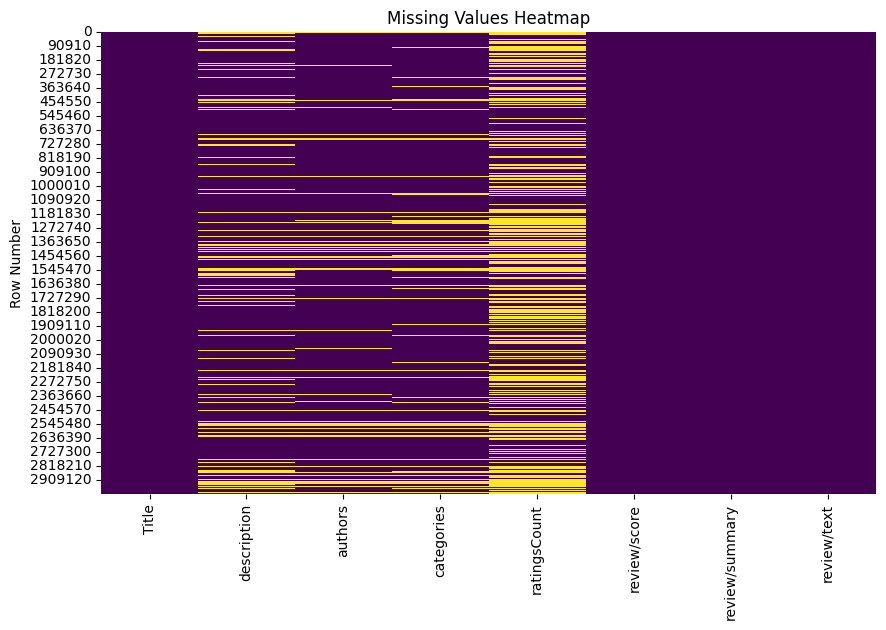

In [17]:
# Visualize Missing Values

plt.figure(figsize=(10, 6))
sns.heatmap(relevant_attributes.isnull(), cbar=False, cmap='viridis') 
plt.title("Missing Values Heatmap")
plt.ylabel("Row Number")  
plt.show()


In [15]:
#Explore Categorical Variables



unique_authors = relevant_attributes['authors'].unique()
print("Unique Authors:", unique_authors)
print("Number of Unique Authors:", len(unique_authors))

unique_categories = relevant_attributes['categories'].unique()
print("\nUnique Categories:", unique_categories)
print("Number of Unique Categories:", len(unique_categories))

unique_reviews = relevant_attributes['review/text'].unique()
print("\nUnique Reviews:", unique_reviews)
print("Number of Unique Reviews:", len(unique_reviews))



Unique Authors: ["['Julie Strain']" "['Philip Nel']" "['David R. Ray']" ...
 "['Daniel Banach', 'Travis Jones']" "['Wild Wild Cabbage']"
 "['David B. Johnson', 'Thomas A. Mowry']"]
Number of Unique Authors: 127279

Unique Categories: ["['Comics & Graphic Novels']" "['Biography & Autobiography']"
 "['Religion']" ... "['Portsmouth Island (N.C.)']" "['Tobacco']"
 "['Flame in the wind (Motion picture)']"]
Number of Unique Categories: 10884

Unique Reviews: ["This is only for Julie Strain fans. It's a collection of her photos -- about 80 pages worth with a nice section of paintings by Olivia.If you're looking for heavy literary content, this isn't the place to find it -- there's only about 2 pages with text and everything else is photos.Bottom line: if you only want one book, the Six Foot One ... is probably a better choice, however, if you like Julie like I like Julie, you won't go wrong on this one either."
 "I don't care much for Dr. Seuss but after reading Philip Nel's book I changed my

In [19]:
# samples of text/review
 
sample_reviews = relevant_attributes['review/text'].sample(n=10) 
for review in sample_reviews:
    print(review)


I enjoyed this book, but could not get past the age difference in the characters. Cassie is 19 and Blair is 38. Add four years and we're talking the age difference between my oldest daughter and me. If Fulton had kept the age span closer to 10-12 years or so, I would have have rated it much higher.
This book contains an excellent treatment of the mathematics for reliability analysis and prediction. It also has numerous, excellent examples that are particularly relevant to the Electronics Industry. I strongly would recommend this book to anyone involved in the instruction of Design for Six Sigma.
Just to comment on the other reviews, this cover was designed by Julie Doucet, the feminist graphic artist from Montreal. If you don't know or understand her work, you might find it ugly or trite, but if you do know it, you know it's anything but!
What a wonderful journey from a boy in Hungry, who flees to America and struggles to fit in and flees again but this time from his family. It capture

In [16]:
# Check for NaN values
nan_values = relevant_attributes.isna().sum()
print("\nNumber of NaN values per column:")
print(nan_values)


Number of NaN values per column:
Title                 208
description        640225
authors            390634
categories         551498
ratingsCount      1360694
review/score            0
review/summary        407
review/text             8
dtype: int64


In [22]:
relevant_attributes.duplicated().sum()



378849

In [173]:
# Drop duplicate rows
relevant_attributes.drop_duplicates(inplace=True)

# Confirm that duplicates are dropped
print("Number of duplicate rows after dropping:", relevant_attributes.duplicated().sum())


C:\Users\Tareq\AppData\Local\Temp\ipykernel_15256\4051406638.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_attributes.drop_duplicates(inplace=True)


Number of duplicate rows after dropping: 0


# In the following few cells, I'll be cleaning. I'll deal with NaN, duplicates, Tokenize, etc. ##

In [239]:
import pandas as pd

# Assuming 'book/review' is the name of the column containing the book or review titles in your DataFrame

# Load your DataFrame
# df = pd.read_csv('your_data.csv')

# Check the distribution of categories in the 'book/review' column
review_text_balance = relevant_attributes['review/text'].value_counts()

print("review/text Column Balance:")
print(review_text_balance)


review/text Column Balance:


KeyboardInterrupt: 

In [23]:
#I Am  Drop rows with missing values in the "review/text" column they are only 10
relevant_attributes = relevant_attributes.dropna(subset=['review/text']).copy()


In [24]:
#Here, Impute missing values in the "ratingsCount" column

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
relevant_attributes.loc[:, 'ratingsCount'] = imputer.fit_transform(relevant_attributes[['ratingsCount']])

In [25]:
# Drop duplicate rows
relevant_attributes.drop_duplicates(inplace=True)


print("Number of duplicate rows after dropping:", relevant_attributes.duplicated().sum())

Number of duplicate rows after dropping: 0


In [26]:
#Replacing missing values in "authors" and "categories" columns with "Unknown"

relevant_attributes['authors'] = relevant_attributes['authors'].fillna('Unknown')
relevant_attributes['categories'] = relevant_attributes['categories'].fillna('Unknown')

In [27]:
# Droping rows with missing values in Title and review/summary columns

relevant_attributes.dropna(subset=['Title', 'review/summary', 'description'], inplace=True)

In [35]:
# Replace "Unknown" with "General" for the first half and "Other" for the second half in the 'authors' column
 

# Define a condition to split the renaming
condition = (np.arange(len(relevant_attributes)) < len(relevant_attributes) / 2)


relevant_attributes.loc[condition, 'authors'] = relevant_attributes.loc[condition, 'authors'].replace('Unknown', 'Unspecified')
relevant_attributes.loc[~condition, 'authors'] =relevant_attributes.loc[~condition, 'authors'].replace('Unknown', 'Other')
                        

In [36]:
# Replace "Unknown" with "General" for the first half and "Other" for the second half in the 'authors' column
import numpy as np


condition = (np.arange(len(relevant_attributes)) < len(relevant_attributes) / 2)


relevant_attributes.loc[condition, 'categories'] = relevant_attributes.loc[condition, 'categories'].replace('Unknown', 'Unspecified')
relevant_attributes.loc[~condition, 'categories'] = relevant_attributes.loc[~condition, 'categories'].replace('Unknown', 'Other')


In [28]:
# Custom function to clean author names 
import pandas as pd
import numpy as np

def clean_and_join_authors(authors):
    if isinstance(authors, str):
        cleaned_authors = [author.strip().strip("'") for author in authors.strip("[]").split(',')]
        return ', '.join(cleaned_authors).replace(',', ', ')
    else:
        return np.nan

relevant_attributes.loc[:,'authors'] = relevant_attributes['authors'].apply(clean_and_join_authors)


print(relevant_attributes['authors'])



1                                  Philip Nel
2                                  Philip Nel
3                                  Philip Nel
4                                  Philip Nel
5                                  Philip Nel
                          ...                
2999995                           Zadie Smith
2999996    David B. Johnson,  Thomas A. Mowry
2999997    David B. Johnson,  Thomas A. Mowry
2999998    David B. Johnson,  Thomas A. Mowry
2999999    David B. Johnson,  Thomas A. Mowry
Name: authors, Length: 2048532, dtype: object


In [29]:
# Custom function to clean remove leading/trailing spaces and single quotes from each category

import numpy as np

def clean_and_join_categories(categories):
    if isinstance(categories, str):
        cleaned_categories = [category.strip("', ") for category in categories.strip("[]").split(',')]
        return ', '.join(cleaned_categories)
    else:
        return np.nan  
 
relevant_attributes['categories'] = relevant_attributes['categories'].apply(clean_and_join_categories)

print(relevant_attributes['categories'])



1          Biography & Autobiography
2          Biography & Autobiography
3          Biography & Autobiography
4          Biography & Autobiography
5          Biography & Autobiography
                     ...            
2999995                      Fiction
2999996                      Unknown
2999997                      Unknown
2999998                      Unknown
2999999                      Unknown
Name: categories, Length: 2048532, dtype: object


In [30]:
relevant_attributes.shape

(2048532, 8)

In [31]:
print(relevant_attributes.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2048532 entries, 1 to 2999999
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Title           object 
 1   description     object 
 2   authors         object 
 3   categories      object 
 4   ratingsCount    float64
 5   review/score    float64
 6   review/summary  object 
 7   review/text     object 
dtypes: float64(2), object(6)
memory usage: 140.7+ MB
None


C:\Users\Tareq\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


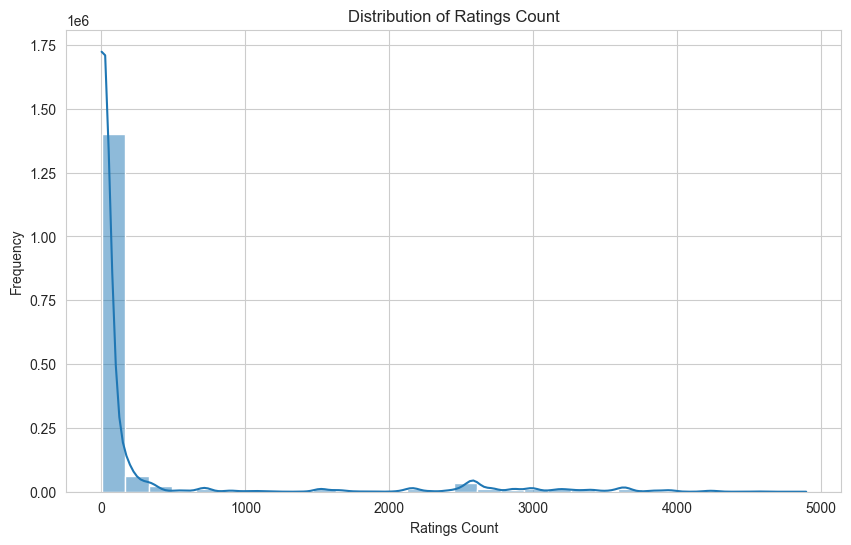

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set_style("whitegrid")

 
plt.figure(figsize=(10, 6))
sns.histplot(data=combined_data, x='ratingsCount', bins=30, kde=True)
plt.title('Distribution of Ratings Count')
plt.xlabel('Ratings Count')
plt.ylabel('Frequency')
plt.show()


### Classification

In [ ]:
#Stratified sampling

import pandas as pd

# Assuming you have a DataFrame named relevant_attributes with the specified attributes
# Let's say you have a column named 'categories' containing the category of each book

# Calculate the distribution of categories
category_distribution = relevant_attributes['categories'].value_counts(normalize=True)

# Define the size of your sample
sample_size = 100000  # You want to sample 100,000 rows

# Initialize an empty DataFrame to store the sampled data
sampled_data = pd.DataFrame(columns=relevant_attributes.columns)

# Iterate over each category
for category, proportion in category_distribution.items():
    # Calculate the number of samples to take from this category based on its proportion
    category_sample_size = int(sample_size * proportion)
    
    # Sample the data for this category using stratified sampling
    category_data = relevant_attributes[relevant_attributes['categories'] == category].sample(category_sample_size)
    
    # Append the sampled data for this category to the overall sampled_data DataFrame
    sampled_data = pd.concat([sampled_data, category_data])

# If the total number of sampled rows is less than the desired sample_size, 
# we can randomly sample the remaining rows from the entire dataset
remaining_sample_size = sample_size - len(sampled_data)
remaining_data = relevant_attributes.sample(remaining_sample_size)
sampled_data = pd.concat([sampled_data, remaining_data])

# Reset the index of the sampled data
sampled_data.reset_index(drop=True, inplace=True)

# Now, sampled_data contains the stratified sample from relevant_attributes with 100,000 rows

In [120]:

relevant_attributes.head()

,Title,description,authors,categories,ratingsCount,review/score,review/summary,review/text
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,Philip Nel,Biography & Autobiography,10.0,5.0,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,Philip Nel,Biography & Autobiography,10.0,5.0,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,Philip Nel,Biography & Autobiography,10.0,4.0,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,Philip Nel,Biography & Autobiography,10.0,4.0,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...
5,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,Philip Nel,Biography & Autobiography,10.0,4.0,One of America's greatest creative talents,"""Dr. Seuss: American Icon"" by Philip Nel is a ..."


In [191]:
 
# Calculate the count of books for each category
category_counts = relevant_attributes['categories'].value_counts()

# Sort the categories based on their counts
sorted_categories = category_counts.sort_values(ascending=False)

# Take the counts of the top ten categories
top_ten_counts = sorted_categories.head(10)

# Calculate the count of the rest of the categories combined
rest_count = sorted_categories[10:].sum()

print("Count of the top ten categories:")
print(top_ten_counts)

print("\nCount of the rest of the categories combined:")
print(rest_count)


Count of the top ten categories:
categories
Fiction                      668204
Juvenile Fiction             168555
Biography & Autobiography     94016
Religion                      82896
History                       81201
Business & Economics          59693
General                       41052
Other                         40891
Computers                     40780
Cooking                       28208
Name: count, dtype: int64

Count of the rest of the categories combined:
741768


In [310]:
import pandas as pd

 
# Replace 'column_name' with the actual column name containing categories
unique_categories = sampled_data['categories'].unique()
total_categories = len(unique_categories)
unique_categories_count = sampled_data['categories'].value_counts()

print("Unique categories and their counts:")
print(unique_categories_count)

# Total number of unique categories
total_unique_categories = len(unique_categories_count)
print("Total number of unique categories:", total_unique_categories)

Unique categories and their counts:
categories
Fiction                                                       33082
Juvenile Fiction                                               8342
Biography & Autobiography                                      4665
Religion                                                       4104
Unknown                                                        4050
History                                                        4021
Business & Economics                                           2955
Computers                                                      2017
Cooking                                                        1406
Social Science                                                 1376
Young Adult Fiction                                            1369
Juvenile Nonfiction                                            1351
Family & Relationships                                         1342
Self-Help                                                      1327
B

In [33]:
# Calculate the count of books for each category
category_counts = relevant_attributes['categories'].value_counts()

# Initialize a dictionary to store the counts
count_of_counts = {}

# Loop through 1 to 10 to get the count of categories with exactly those number of books
for i in range(1, 11):
    # Use .get(i, 0) to return 0 if 'i' is not found in the index (i.e., no category with exactly 'i' books)
    count_of_counts[i] = category_counts.value_counts().get(i, 0)

# Print the result
for books_count, categories_count in count_of_counts.items():
    print(f"Number of categories with exactly {books_count} book(s): {categories_count}")

# Replace "Unknown" with "General" for the first half and "Other" for the second half in the 'categories' column
import numpy as np

# Define a condition to split the renaming
condition = (np.arange(len(relevant_attributes)) < len(relevant_attributes) / 2)


relevant_attributes.loc[condition, 'categories'] = relevant_attributes.loc[condition, 'categories'].replace('Unknown', 'General')
relevant_attributes.loc[~condition, 'categories'] = relevant_attributes.loc[~condition, 'categories'].replace('Unknown', 'Other')

Number of categories with exactly 1 book(s): 1268
Number of categories with exactly 2 book(s): 699
Number of categories with exactly 3 book(s): 482
Number of categories with exactly 4 book(s): 373
Number of categories with exactly 5 book(s): 252
Number of categories with exactly 6 book(s): 219
Number of categories with exactly 7 book(s): 159
Number of categories with exactly 8 book(s): 134
Number of categories with exactly 9 book(s): 116
Number of categories with exactly 10 book(s): 120


In [248]:
# Replace "Unknown" with "General" for the first half and "Other" for the second half in the 'authors' column
import numpy as np


condition = (np.arange(len(relevant_attributes)) < len(relevant_attributes) / 2)


relevant_attributes.loc[condition, 'categories'] = relevant_attributes.loc[condition, 'categories'].replace('Unknown', 'Unspecified')
relevant_attributes.loc[~condition, 'categories'] = relevant_attributes.loc[~condition, 'categories'].replace('Unknown', 'Other')



In [190]:
# Update the redistributed counts to move the single book category to "Fiction"
redistributed_counts[1] = 0  # Remove the count from the single book category
redistributed_counts[2] += 1  # Add the count to the "Fiction" category

print("Updated Redistributed counts:", redistributed_counts)


Updated Redistributed counts: {2: 704, 3: 483, 4: 374, 5: 253, 6: 220, 7: 160, 8: 135, 9: 117, 10: 121, 1: 0}


In [183]:
# Assuming you have a DataFrame named relevant_attributes with a 'categories' column

# Calculate the count of books for each category
category_counts = relevant_attributes['categories'].value_counts()

# Count the number of categories that have 1 book, 2 books, up to 10 books
category_appearances = category_counts.value_counts().sort_index()

# Initialize a dictionary to store the counts
category_count_dict = {}

# Add counts for categories with 1 book up to 10 books
total_count = 0
for count in range(1, 11):
    category_count_dict[count] = category_appearances.get(count, 0)
    total_count += category_count_dict[count]

# Calculate the total count of categories regardless of the number of books
total_categories = len(category_counts)

print("Count of categories that have 1 book, 2 books, up to 10 books:")
print(category_count_dict)
print("\nTotal count of categories regardless of the number of books:", total_categories)
print("Total count of categories with 1 book, 2 books, up to 10 books:", total_count)


Count of categories that have 1 book, 2 books, up to 10 books:
{1: 1268, 2: 699, 3: 482, 4: 373, 5: 252, 6: 219, 7: 159, 8: 134, 9: 116, 10: 120}

Total count of categories regardless of the number of books: 5417
Total count of categories with 1 book, 2 books, up to 10 books: 3822


In [184]:
# Filter out categories with only one book
filtered_categories = relevant_attributes['categories'].value_counts()
filtered_categories = filtered_categories[filtered_categories > 1]

# Now you can use 'filtered_categories' to index back into your DataFrame
# This will give you a DataFrame where each category has more than one book
relevant_attributes = relevant_attributes[relevant_attributes['categories'].isin(filtered_categories.index)]


In [186]:
for category, count in category_counts.items():
    print(f"{category}: {count}")


Fiction: 668204
Juvenile Fiction: 168555
Biography & Autobiography: 94016
Religion: 82896
History: 81201
Business & Economics: 59693
General: 41052
Other: 40891
Computers: 40780
Cooking: 28208
Young Adult Fiction: 27732
Social Science: 27712
Juvenile Nonfiction: 27226
Family & Relationships: 27037
Self-Help: 26915
Body, Mind & Spirit: 26399
Health & Fitness: 23518
Political Science: 20905
Sports & Recreation: 20825
Science: 20548
Philosophy: 16589
Psychology: 16533
Education: 15330
Travel: 14367
Music: 13184
Language Arts & Disciplines: 13075
Literary Criticism: 13070
Drama: 12983
Comics & Graphic Novels: 12618
Crafts & Hobbies: 12343
Humor: 12318
Art: 11943
True Crime: 10838
Performing Arts: 9990
Reference: 9962
Foreign Language Study: 9951
Medical: 9881
Nature: 9385
Poetry: 7943
Technology & Engineering: 7648
Pets: 7376
Adventure stories: 7063
Mathematics: 6552
Games & Activities: 5999
Bibles: 5393
Photography: 5188
Transportation: 4339
"Children's stories": 4310
Games: 4257
Law: 419

In [77]:
# Save the DataFrame to a CSV file


category_counts = relevant_attributes['categories'].value_counts()

# Create a DataFrame with category and its count
category_counts_df = pd.DataFrame({'Category': category_counts.index, 'Count': category_counts.values})

# Define the file path for the CSV file on your desktop
output_file_path = r"C:\Users\Tareq\Desktop\category_counts.csv"

category_counts_df.to_csv(output_file_path, index=False)

print("Category counts saved to", output_file_path)


Category counts saved to C:\Users\Tareq\Desktop\category_counts.csv


C:\Users\Tareq\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


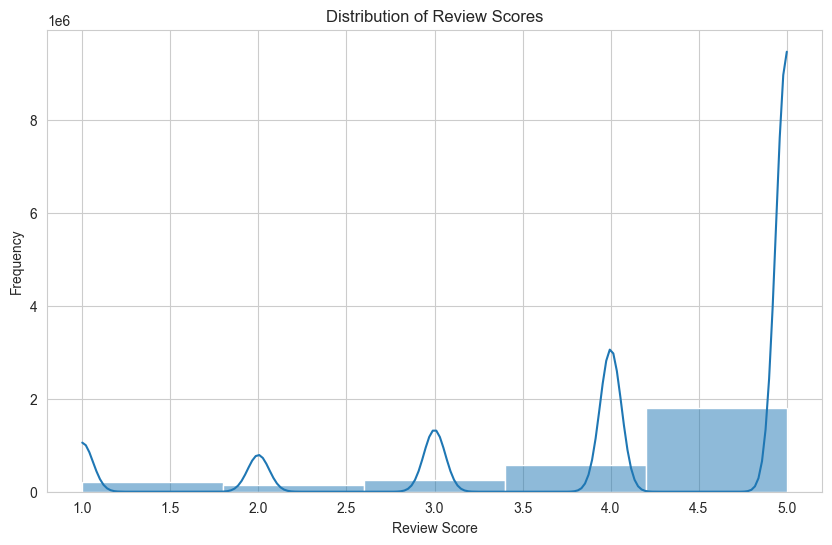

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set_style("whitegrid")

# Visualizing the distribution of review scores
plt.figure(figsize=(10, 6))
sns.histplot(data=relevant_attributes, x='review/score', bins=5, kde=True)
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.show()


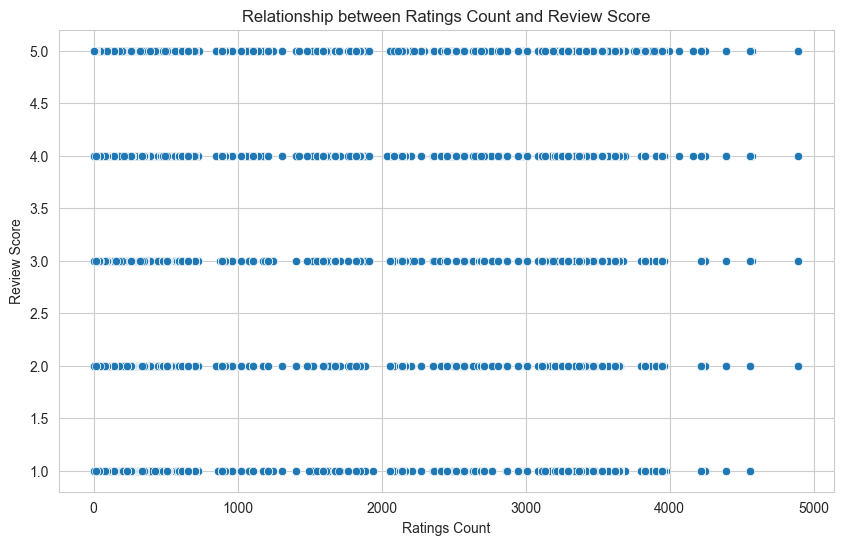

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set_style("whitegrid")

# Visualizing the relationship between review score and ratings count
plt.figure(figsize=(10, 6))
sns.scatterplot(data=relevant_attributes, x='ratingsCount', y='review/score')
plt.title('Relationship between Ratings Count and Review Score')
plt.xlabel('Ratings Count')
plt.ylabel('Review Score')
plt.show()


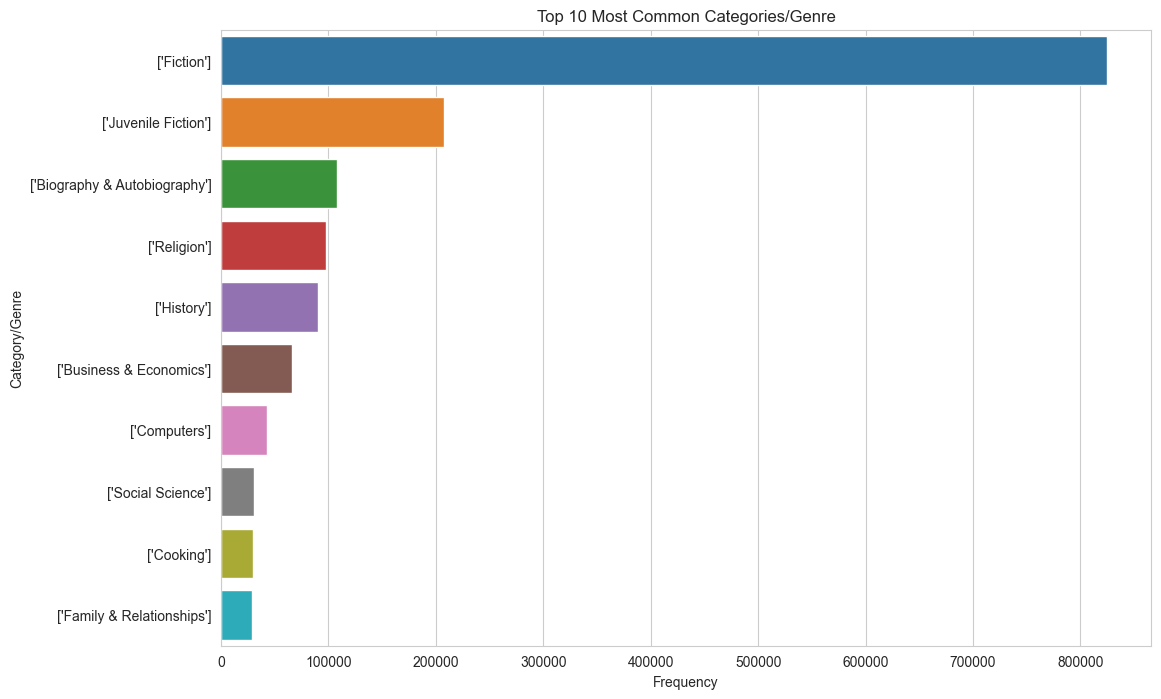

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set_style("whitegrid")

# Visualizing the distribution of categories
plt.figure(figsize=(12, 8))
sns.countplot(data=relevant_attributes, y='categories', order=combined_data['categories'].value_counts().index[:10])
plt.title('Top 10 Most Common Categories/Genre')
plt.xlabel('Frequency')
plt.ylabel('Category/Genre')
plt.show()


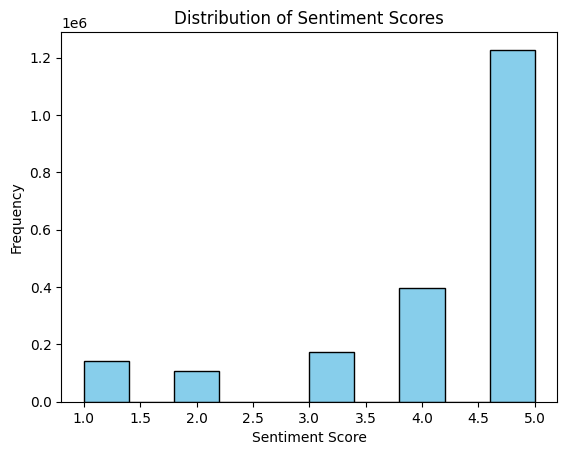

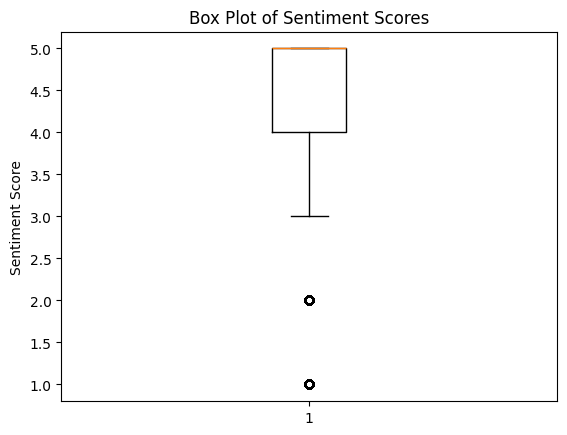

In [132]:
import matplotlib.pyplot as plt

# Plot histogram of sentiment scores
plt.hist(relevant_attributes['review/score'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Plot box plot of sentiment scores
plt.boxplot(relevant_attributes['review/score'])
plt.title('Box Plot of Sentiment Scores')
plt.ylabel('Sentiment Score')
plt.show()


In [31]:
# Calculate summary statistics
mean = relevant_attributes['review/score'].mean()
median = relevant_attributes['review/score'].median()
std_dev = relevant_attributes['review/score'].std()
skewness = relevant_attributes['review/score'].skew()
kurtosis = relevant_attributes['review/score'].kurtosis()

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Standard Deviation: {std_dev}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")


Mean: 4.215289333333334
Median: 5.0
Standard Deviation: 1.2030537472334013
Skewness: -1.5191028505130895
Kurtosis: 1.2064600645925103


In [43]:
# Check for NaN values
nan_values = relevant_attributes.isna().sum()
print("\nNumber of NaN values per column:")
print(nan_values)


Number of NaN values per column:
Title             0
description       0
authors           0
categories        0
ratingsCount      0
review/score      0
review/summary    0
review/text       0
dtype: int64


In [54]:
# Explore textual columns in combined_data DataFrame
text_columns = ["Title", "description", "authors", "publisher", "categories", "review/summary", "review/text"]
for col in text_columns:
    print(f"Column: {col}")
    print(combined_data[col].head(20))
    print("\n")

Column: Title
0            Its Only Art If Its Well Hung!
1                  Dr. Seuss: American Icon
2                  Dr. Seuss: American Icon
3                  Dr. Seuss: American Icon
4                  Dr. Seuss: American Icon
5                  Dr. Seuss: American Icon
6                  Dr. Seuss: American Icon
7                  Dr. Seuss: American Icon
8                  Dr. Seuss: American Icon
9                  Dr. Seuss: American Icon
10    Wonderful Worship in Smaller Churches
11    Wonderful Worship in Smaller Churches
12    Wonderful Worship in Smaller Churches
13    Wonderful Worship in Smaller Churches
14            Whispers of the Wicked Saints
15            Whispers of the Wicked Saints
16            Whispers of the Wicked Saints
17            Whispers of the Wicked Saints
18            Whispers of the Wicked Saints
19            Whispers of the Wicked Saints
Name: Title, dtype: object


Column: description
0                                                   NaN
1

In [40]:
print(relevant_attributes.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2048532 entries, 1 to 2999999
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Title           object 
 1   description     object 
 2   authors         object 
 3   categories      object 
 4   ratingsCount    float64
 5   review/score    float64
 6   review/summary  object 
 7   review/text     object 
dtypes: float64(2), object(6)
memory usage: 140.7+ MB
None


# Sampling Panda

In [59]:
#Stratified sampling

import pandas as pd

# Assuming you have a DataFrame named relevant_attributes with the specified attributes
# Let's say you have a column named 'categories' containing the category of each book

# Calculate the distribution of categories
category_distribution = relevant_attributes['categories'].value_counts(normalize=True)

# Define the size of your sample
sample_size = 100000  # You want to sample 100,000 rows

# Initialize an empty DataFrame to store the sampled data
sampled_data = pd.DataFrame(columns=relevant_attributes.columns)

# Iterate over each category
for category, proportion in category_distribution.items():
    # Calculate the number of samples to take from this category based on its proportion
    category_sample_size = int(sample_size * proportion)
    
    # Sample the data for this category using stratified sampling
    category_data = relevant_attributes[relevant_attributes['categories'] == category].sample(category_sample_size)
    
    # Append the sampled data for this category to the overall sampled_data DataFrame
    sampled_data = pd.concat([sampled_data, category_data])

# If the total number of sampled rows is less than the desired sample_size, 
# we can randomly sample the remaining rows from the entire dataset
remaining_sample_size = sample_size - len(sampled_data)
remaining_data = relevant_attributes.sample(remaining_sample_size)
sampled_data = pd.concat([sampled_data, remaining_data])

# Reset the index of the sampled data
sampled_data.reset_index(drop=True, inplace=True)

# Now, sampled_data contains the stratified sample from relevant_attributes with 100,000 rows


C:\Users\Tareq\AppData\Local\Temp\ipykernel_15256\2939763351.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  sampled_data = pd.concat([sampled_data, category_data])


In [60]:
sampled_data.head(150)

,Title,description,authors,categories,ratingsCount,review/score,review/summary,review/text
0,Invisible Man,An African-American man's search for success a...,Ralph Ellison,Fiction,94.0,5.0,The science of Nobodiness,Ralph Ellison's INVISIBLE MAN tackles an issue...
1,In the Company of the Courtesan: A Novel,"My lady, Fiammetta Bianchini, was plucking her...",Sarah Dunant,Fiction,62.0,3.0,"Interesting, but not epic.","When I first began reading ""In the Company of ..."
2,Stanger in a Strange Land,The original uncut edition of STRANGER IN A ST...,Robert A. Heinlein,Fiction,116.0,5.0,The best book I have ever read!,This book is by far the best book I have ever ...
3,Black Rose (In the Garden Series),Drie vrouwen ontmoeten elkaar op een keerpunt ...,Nora Roberts,Fiction,10.0,5.0,A Pretty Good Book!!,I was surprised that I liked this book as much...
4,Jesus' Son,Eleven stories narrated by a young recovering ...,Denis Johnson,Fiction,44.0,5.0,An American Oddysey,A collection of thematically linked short stor...
...,...,...,...,...,...,...,...,...
145,Vermilion (An Alyson Mystery),A dead young hustler is found with a lipstick-...,Nathan Aldyne,Fiction,3.0,5.0,Going Gaily Forward,This series of gay-themed mysteries is a hoot ...
146,Alice's Adventures in Wonderland / Through the...,"All the ""muchness"" of Wonderland captured in o...",Lewis Carroll,Fiction,10.0,5.0,Alice,This is a book that seems to stay with what Le...
147,Piranha: Firing Point,The East China Sea. Six Japanese submarines ar...,Michael DiMercurio,Fiction,10.0,1.0,Incredible - really!,I agree with the Folk from Nebraska. I was rea...
148,"Spoilers, The","""The Spoilers"" by Rex Beach. Published by Good...",Rex Beach,Fiction,10.0,4.0,Still Good Reading After More Than A Century,This is a gripping book that is full of advent...


In [62]:
# Save the sampled_data DataFrame to a CSV file
file_path = r'C:\Users\Tareq\Desktop\sampled_data.csv'


sampled_data.to_csv(file_path, index=False)

print("Sampled data saved to CSV file:", file_path)


Sampled data saved to CSV file: C:\Users\Tareq\Desktop\sampled_data.csv


# sklearn sample

In [256]:
from sklearn.model_selection import StratifiedShuffleSplit
import pandas as pd

# Assuming 'relevant_attributes' is your DataFrame and you're stratifying based on 'categories'
X = relevant_attributes.drop(['categories'], axis=1)  # Drop 'categories' to exclude it from features
y = relevant_attributes['categories']  # Use the original 'categories' column for stratification

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=1)  # Adjust test_size as needed

# Initialize an empty DataFrame to store the sampled data
sampled_df = pd.DataFrame()

for train_index, test_index in sss.split(X, y):
    X_sample = X.iloc[test_index]  # Get the features for the sampled data
    y_sample = y.iloc[test_index]  # Get the corresponding categories for the sampled data
    sampled_df = X_sample.copy()  # Ensure we're working with a copy to avoid SettingWithCopyWarning
    sampled_df['categories'] = y_sample  # Add 'categories' column back to the sampled DataFrame

# Displaying the sampled DataFrame information
print(sampled_df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 204727 entries, 2200108 to 1148001
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Title           204727 non-null  object 
 1   description     204727 non-null  object 
 2   authors         204727 non-null  object 
 3   ratingsCount    204727 non-null  float64
 4   review/score    204727 non-null  float64
 5   review/summary  204727 non-null  object 
 6   review/text     204727 non-null  object 
 7   categories      204727 non-null  object 
dtypes: float64(2), object(6)
memory usage: 14.1+ MB
None


In [424]:
sampled_df.head()

,Title,description,authors,ratingsCount,review/score,review/summary,review/text,categories,tokenized_review,sentiment_category,review_length
0,Sacred Path Cards: The Discovery of Self Throu...,This extraordinary tool for self-discovery dra...,Jamie Sams,2.0,4.0,I regularly use the cards and read the book an...,The book and the cards have definately changed...,"Body, Mind & Spirit","['book', 'cards', 'definately', 'changed', 'li...",Positive,51
1,Lord of the flies,William Golding’s unforgettable classic of boy...,William Golding,2861.0,5.0,Lord of the Flies,This book was written excellentally by Golding...,Fiction,"['book', 'written', 'excellentally', 'Golding'...",Positive,37
2,Lord of the Flies,William Golding’s unforgettable classic of boy...,William Golding,2861.0,4.0,Lord of the flies,The Lord of the flies takes you on a realistic...,Fiction,"['Lord', 'flies', 'takes', 'realistic', 'journ...",Positive,86
3,The doomsters,"Hired by Carl Hallman, the desperate-eyed junk...",Ross Macdonald,3.0,5.0,Both a good puzzler and good though tragic drama,I don't know why the heck it took me so long t...,Fiction,"['know', 'heck', 'took', 'long', 'discover', '...",Positive,167
4,"The Hobbitt, or there and back again; illustra...","Bilbo Baggins, a respectable, well-to-do hobbi...",J. R. R. Tolkien,9.0,5.0,Classic,This book is a timeless classic that is and wi...,Fiction,"['book', 'timeless', 'classic', 'continue', 'e...",Positive,26


### Validation the Sample 

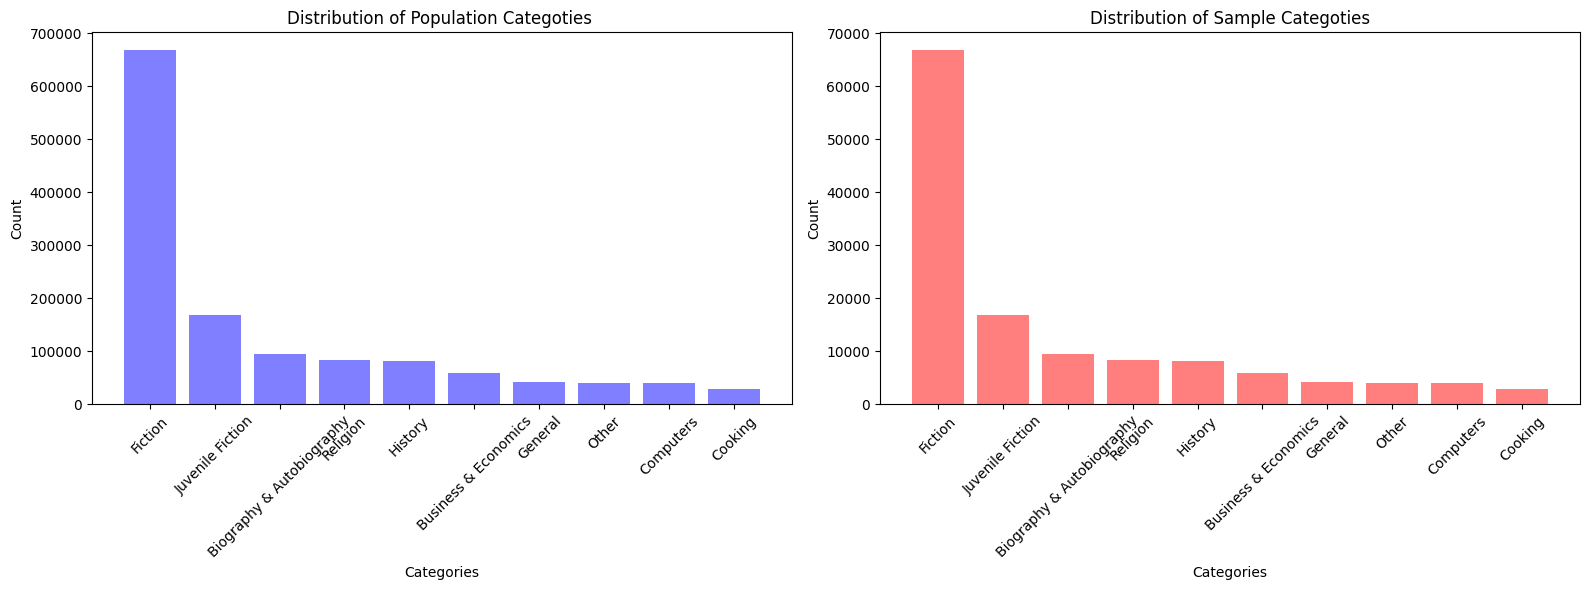

In [257]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each category in the population and sample
population_category_counts = relevant_attributes['categories'].value_counts()
sample_category_counts = sampled_df['categories'].value_counts()

# Select the top N most common categories
N = 10  # You can adjust this value based on your preference
top_population_categories = population_category_counts.head(N)
top_sample_categories = sample_category_counts.head(N)

# Create two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot the distribution of the top N most common categories for the population
axes[0].bar(top_population_categories.index, top_population_categories.values, color='blue', alpha=0.5)
axes[0].set_title('Distribution of Population Categoties ')
axes[0].set_xlabel('Categories')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Plot the distribution of the top N most common categories for the sample
axes[1].bar(top_sample_categories.index, top_sample_categories.values, color='red', alpha=0.5)
axes[1].set_title('Distribution of Sample Categoties')
axes[1].set_xlabel('Categories')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()



 

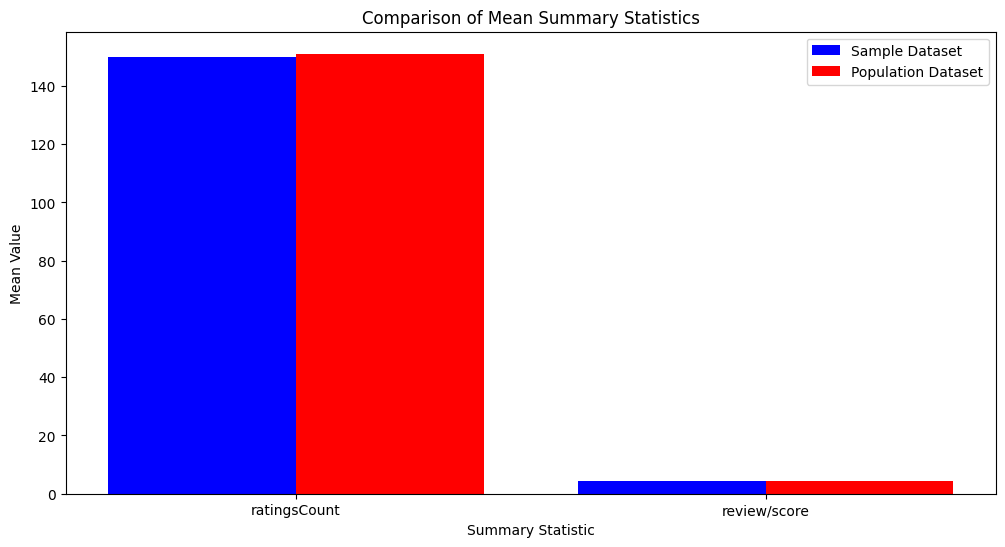

In [270]:
# Compute summary statistics for the population dataset

import pandas as pd
import numpy as np

population_summary_stats = population_df.describe(include='all')

population_summary_stats.loc['max', 'ratingsCount'] = np.nan

sample_summary_stats = sample_df.describe(include='all')


print("Population Summary Statistics:")
print(population_summary_stats)

print("\nSample Summary Statistics:")
print(sample_summary_stats)

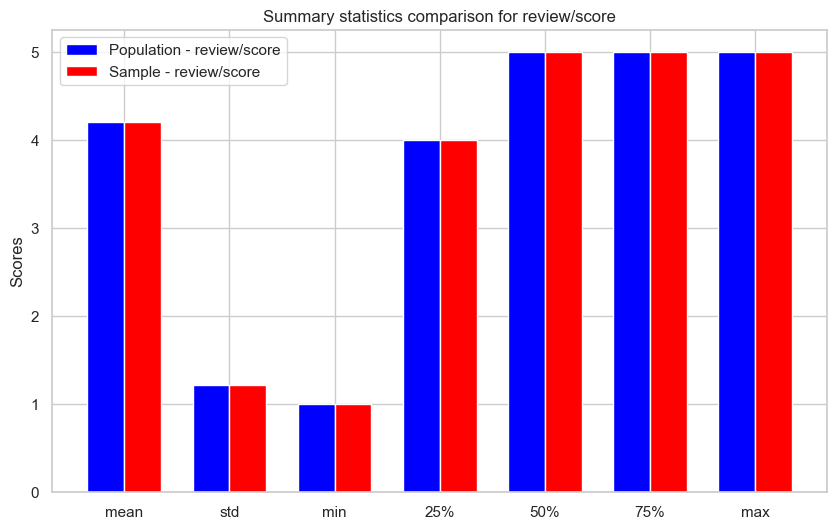

In [415]:
# Compute summary statistics 'review/score' 

population_summary_stats = relevant_attributes['review/score'].describe()
sample_summary_stats = sampled_df['review/score'].describe()

fig, ax = plt.subplots(figsize=(10, 6))  # Create 1 plot



rects1 = ax.bar(x - width/2, population_vals, width, label='Population - review/score', color='blue')
rects2 = ax.bar(x + width/2, sample_vals, width, label='Sample - review/score', color='red')

ax.set_ylabel('Scores')
ax.set_title('Summary statistics comparison for review/score')
ax.set_xticks(x)
ax.set_xticklabels(stats)
ax.legend()

plt.show()


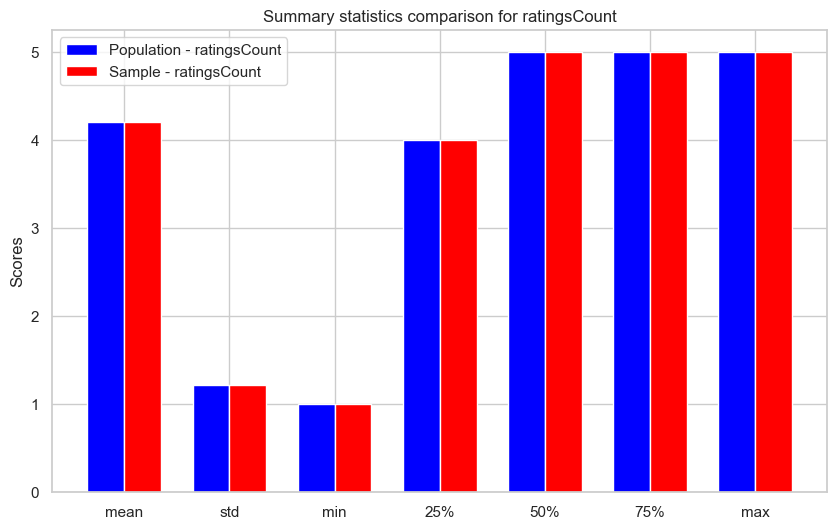

In [416]:
# Compute summary statistics for 'ratingsCount' for both datasets original and sampled 
population_summary_stats = relevant_attributes['ratingsCount'].describe()
sample_summary_stats = sampled_df['ratingsCount'].describe()

fig, ax = plt.subplots(figsize=(10, 6))   

rects1 = ax.bar(x - width/2, population_vals, width, label='Population - ratingsCount', color='blue')
rects2 = ax.bar(x + width/2, sample_vals, width, label='Sample - ratingsCount', color='red')

ax.set_ylabel('Scores')
ax.set_title('Summary statistics comparison for ratingsCount')
ax.set_xticks(x)
ax.set_xticklabels(stats)
ax.legend()


C:\Users\Tareq\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tareq\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tareq\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Tareq\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

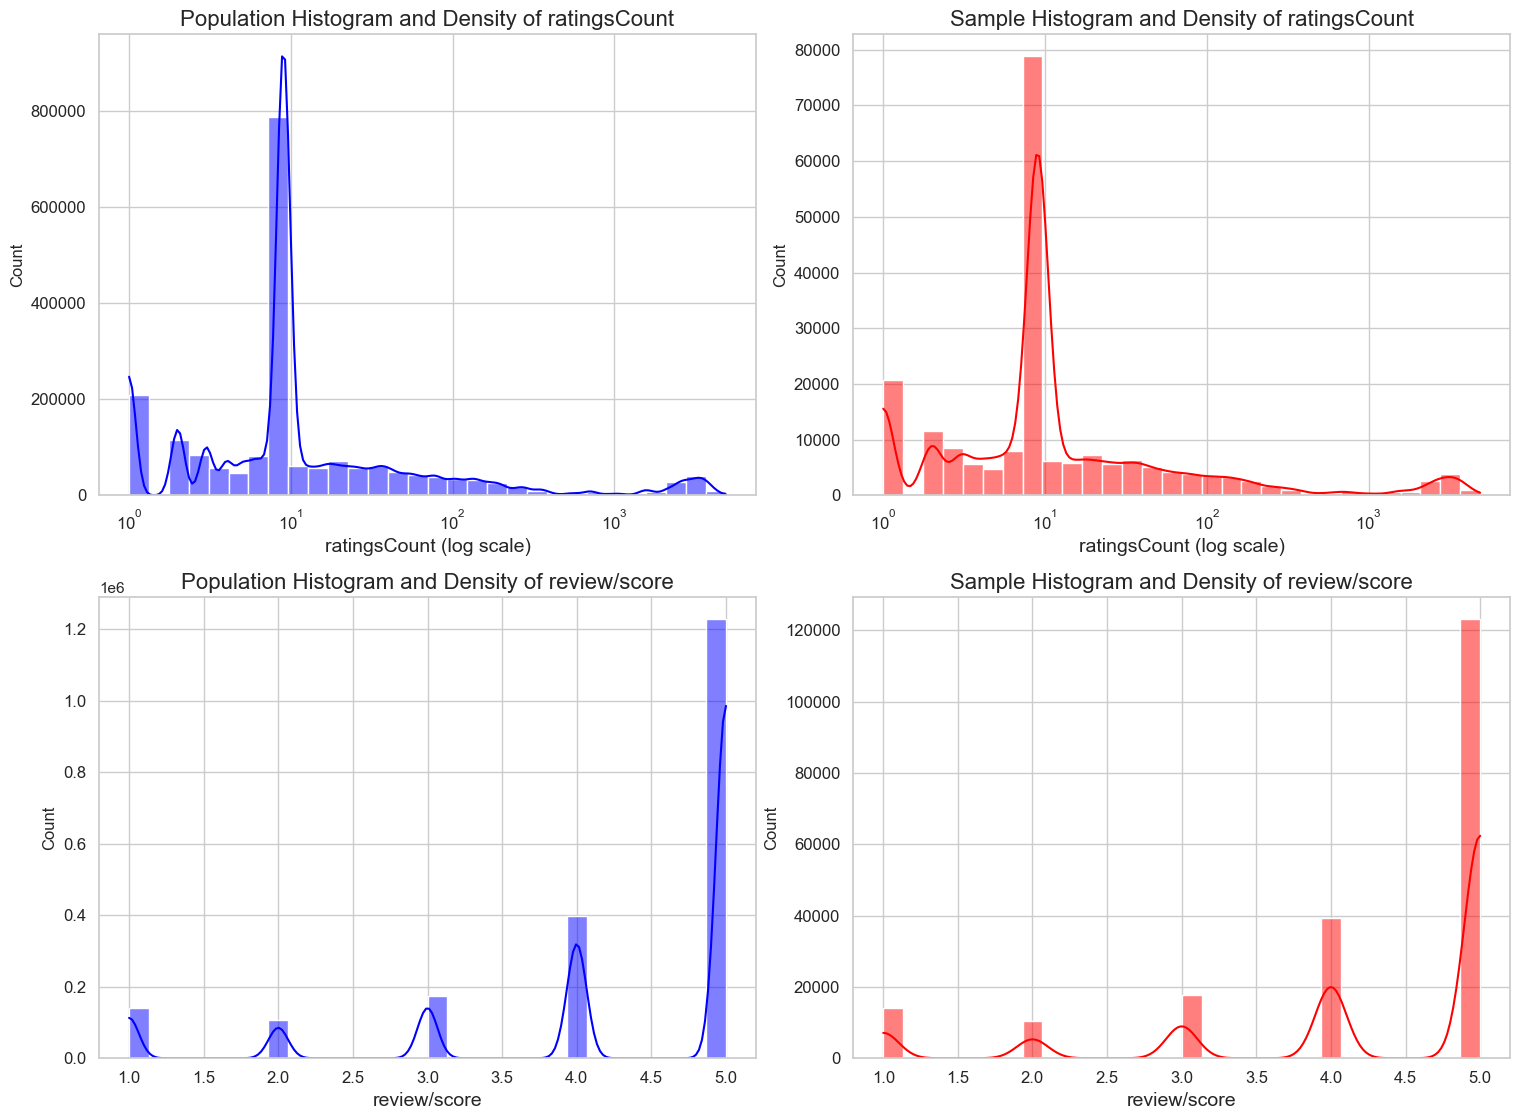

In [290]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn for better visuals
sns.set(style="whitegrid")

# Create a figure with subplots arranged in 2x2
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histogram for ratingsCount - Population
sns.histplot(relevant_attributes['ratingsCount'], bins=30, kde=True, color="blue", ax=axes[0, 0], log_scale=True)
axes[0, 0].set_title('Population Histogram and Density of ratingsCount', fontsize=16)
axes[0, 0].set_xlabel('ratingsCount (log scale)', fontsize=14)
axes[0, 0].tick_params(axis='both', which='major', labelsize=12)

# Histogram for ratingsCount - Sample
sns.histplot(sampled_df['ratingsCount'], bins=30, kde=True, color="red", ax=axes[0, 1], log_scale=True)
axes[0, 1].set_title('Sample Histogram and Density of ratingsCount', fontsize=16)
axes[0, 1].set_xlabel('ratingsCount (log scale)', fontsize=14)
axes[0, 1].tick_params(axis='both', which='major', labelsize=12)

# Histogram for review/score - Population
sns.histplot(relevant_attributes['review/score'], bins=30, kde=True, color="blue", ax=axes[1, 0])
axes[1, 0].set_title('Population Histogram and Density of review/score', fontsize=16)
axes[1, 0].set_xlabel('review/score', fontsize=14)
axes[1, 0].tick_params(axis='both', which='major', labelsize=12)

# Histogram for review/score - Sample
sns.histplot(sampled_df['review/score'], bins=30, kde=True, color="red", ax=axes[1, 1])
axes[1, 1].set_title('Sample Histogram and Density of review/score', fontsize=16)
axes[1, 1].set_xlabel('review/score', fontsize=14)
axes[1, 1].tick_params(axis='both', which='major', labelsize=12)

# Adjusting layout for better visual presentation
plt.tight_layout(pad=3.0, w_pad=0.5, h_pad=1.0)


plt.show()



In [198]:
# Proportion of categories in the full dataset
full_dataset_props = relevant_attributes['categories'].value_counts(normalize=True) * 100

# Proportion of categories in the sampled dataset
sampled_dataset_props = sampled_df['categories'].value_counts(normalize=True) * 100

# Compare the proportions
comparison_df = pd.DataFrame({'Full Dataset': full_dataset_props, 'Sampled Dataset': sampled_dataset_props})

print(comparison_df)


                                                    Full Dataset  \
categories                                                         
"Alzheimer's disease"                                   0.002052   
"Amérique latine - Histoire - 1806-1830 (Guerre...      0.000098   
"Apostles' Creed"                                       0.000391   
"Artists' books"                                        0.000147   
"Autochtones - Canada - Relations avec l'État"          0.000098   
...                                                          ...   
Yugoslav War, 1991-                                     0.000586   
Zanzibar                                                0.000293   
Zen Buddhism                                            0.000147   
Zen Meditations                                         0.000440   
Zines                                                   0.000098   

                                                    Sampled Dataset  
categories                                   

In [199]:
#Statistics  For ratingsCount
print("Full dataset 'ratingsCount' statistics:", relevant_attributes['ratingsCount'].describe())
print("Sampled dataset 'ratingsCount' statistics:", sampled_df['ratingsCount'].describe())

# For review/score
print("Full dataset 'review/score' statistics:", relevant_attributes['review/score'].describe())
print("Sampled dataset 'review/score' statistics:", sampled_df['review/score'].describe())


Full dataset 'ratingsCount' statistics: count    2.047264e+06
mean     1.510525e+02
std      6.019904e+02
min      1.000000e+00
25%      5.000000e+00
50%      9.000000e+00
75%      1.900000e+01
max      4.895000e+03
Name: ratingsCount, dtype: float64
Sampled dataset 'ratingsCount' statistics: count    204727.000000
mean        149.965329
std         600.778609
min           1.000000
25%           5.000000
50%           9.000000
75%          19.000000
max        4895.000000
Name: ratingsCount, dtype: float64
Full dataset 'review/score' statistics: count    2.047264e+06
mean     4.204405e+00
std      1.212204e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: review/score, dtype: float64
Sampled dataset 'review/score' statistics: count    204727.000000
mean          4.207071
std           1.211205
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: rev

In [200]:
unique_categories_sampled = sampled_df['categories'].unique()
print("Unique categories in the sampled dataset:", unique_categories_sampled)
print("Total unique categories in the sampled dataset:", len(unique_categories_sampled))


Unique categories in the sampled dataset: ['Body, Mind & Spirit' 'Fiction' 'Philosophy' ... 'Job satisfaction'
 'Individual retirement accounts' 'Netherlands']
Total unique categories in the sampled dataset: 2595


In [208]:
print(sampled_df.isna())


         Title  description  authors  ratingsCount  review/score  \
2200108  False        False    False         False         False   
86878    False        False    False         False         False   
1837261  False        False    False         False         False   
197958   False        False    False         False         False   
139049   False        False    False         False         False   
...        ...          ...      ...           ...           ...   
2706417  False        False    False         False         False   
1172274  False        False    False         False         False   
1002096  False        False    False         False         False   
1102601  False        False    False         False         False   
1148001  False        False    False         False         False   

         review/summary  review/text  categories  
2200108           False        False       False  
86878             False        False       False  
1837261           False       

In [211]:
unique_categories_full = relevant_attributes['categories'].unique()
print("Unique categories in the full dataset:", unique_categories_full)
print("Total unique categories in the full dataset:", len(unique_categories_full))


Unique categories in the full dataset: ['Biography & Autobiography' 'Religion' 'Fiction' ...
 'Colombo (Sri Lanka)' 'Commodity futures' 'Outlaws']
Total unique categories in the full dataset: 4149


In [213]:
import pandas as pd

# Assuming 'sampled_df' is your DataFrame and it's already loaded with your data
# Replace 'Unknown' with the actual representation of unknown authors in your dataset

# Count how many books have an 'Unknown' author
unknown_authors_count = (sampled_df['authors'] == 'Unknown').sum()

print(f"Number of books with 'Unknown' authors: {unknown_authors_count}")



Number of books with 'Unknown' authors: 1916


In [205]:
# Assuming you have a DataFrame named relevant_attributes with a 'categories' column

# Calculate the count of books for each category
category_counts = relevant_attributes['categories'].value_counts()

# Sort the categories based on their counts
sorted_categories = category_counts.sort_values(ascending=False)

# Take the counts of the top ten categories
top_ten_counts = sorted_categories.head(10)

# Calculate the count of the rest of the categories combined
rest_count = sorted_categories[10:].sum()

print("Count of the top ten categories relevant_attributes :")
print(top_ten_counts)

print("\nCount of the rest of the categories combined:")
print(rest_count)


Count of the top ten categories relevant_attributes :
categories
Fiction                      668204
Juvenile Fiction             168555
Biography & Autobiography     94016
Religion                      82896
History                       81201
Business & Economics          59693
General                       41052
Other                         40891
Computers                     40780
Cooking                       28208
Name: count, dtype: int64

Count of the rest of the categories combined:
741768


In [204]:
# Assuming you have a DataFrame named relevant_attributes with a 'categories' column

# Calculate the count of books for each category
category_counts = sampled_df['categories'].value_counts()

# Sort the categories based on their counts
sorted_categories = category_counts.sort_values(ascending=False)

# Take the counts of the top ten categories
top_ten_counts = sorted_categories.head(10)

# Calculate the count of the rest of the categories combined
rest_count = sorted_categories[10:].sum()

print("Count of the top ten categories sampled_df :")
print(top_ten_counts)

print("\nCount of the rest of the categories combined:")
print(rest_count)


Count of the top ten categories sampled_df :
categories
Fiction                      66821
Juvenile Fiction             16856
Biography & Autobiography     9402
Religion                      8290
History                       8120
Business & Economics          5969
General                       4105
Other                         4089
Computers                     4078
Cooking                       2821
Name: count, dtype: int64

Count of the rest of the categories combined:
74176


In [65]:
# Calculate the distribution of categories
category_distribution = relevant_attributes['categories'].value_counts(normalize=True)

print("Category Distribution:")
print(category_distribution)


Category Distribution:
categories
Fiction                               3.261868e-01
Juvenile Fiction                      8.228087e-02
Biography & Autobiography             4.589433e-02
Religion                              4.046605e-02
Unknown                               4.000084e-02
                                          ...     
Action research in education          4.881544e-07
Vintners                              4.881544e-07
Canon law                             4.881544e-07
Caucasus, Northern (Russia)           4.881544e-07
Flame in the wind (Motion picture)    4.881544e-07
Name: proportion, Length: 5416, dtype: float64


In [188]:
import pandas as pd

# Assuming relevant_attributes is your DataFrame with 'book_categories' column
# Example:
# relevant_attributes = pd.DataFrame({'book_categories': ['Fiction', 'Fantasy', 'Fiction', 'Mystery', 'Fantasy', 'Science Fiction', 'Mystery', 'Thriller', 'Science Fiction']})

# Count occurrences of each category
category_counts = sampled_data['categories'].value_counts()

# Total number of categories
total_categories = len(sampled_data['categories'])

# Number of unique categories
unique_categories = len(category_counts)

# Print results
print("Total number of categories:", total_categories)
print("Number of unique categories:", unique_categories)
print("Books per category:")
print(category_counts)

Total number of categories: 100000
Number of unique categories: 1010
Books per category:
categories
Fiction                                     33082
Juvenile Fiction                             8342
Biography & Autobiography                    4665
Religion                                     4104
Unknown                                      4050
                                            ...  
Cabala                                          1
Beagle Expedition                               1
Mexico                                          1
Mountaineering                                  1
Amritsar Massacre, Amritsar, India, 1919        1
Name: count, Length: 1010, dtype: int64


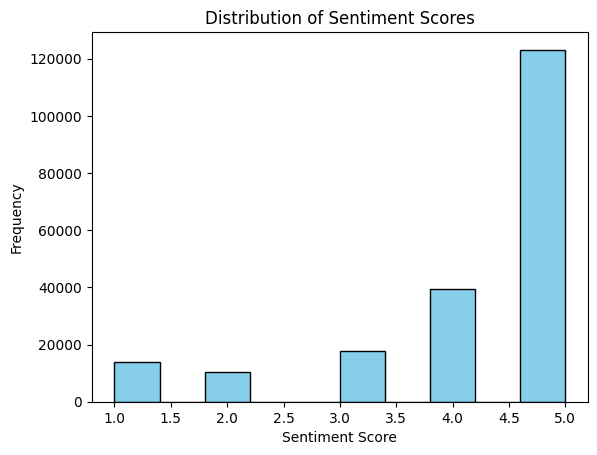

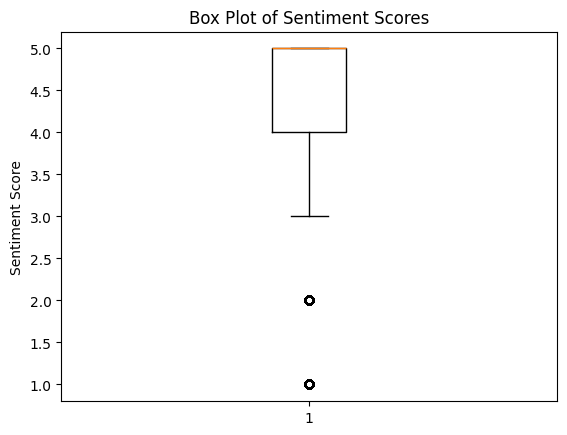

In [206]:
import matplotlib.pyplot as plt

# Plot histogram of sentiment scores
plt.hist(sampled_df['review/score'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Plot box plot of sentiment scores
plt.boxplot(sampled_data['review/score'])
plt.title('Box Plot of Sentiment Scores-review/score')
plt.ylabel('Sentiment Score')
plt.show()

# Text preprocessing   

### Tokenization

In [303]:
# here Tokenization and stop word and Punctuation removal

import pandas as pd
import spacy
 
nlp = spacy.load("en_core_web_sm")

def tokenize_review(review):
 
    doc = nlp(review)
    tokens = [token.text for token in doc if not token.is_punct and not token.is_stop]
    return tokens

sampled_df['tokenized_review'] = sampled_df['review/text'].apply(tokenize_review)

print(sampled_df.head())


                                                     Title  \
2200108  Sacred Path Cards: The Discovery of Self Throu...   
86878                                    Lord of the flies   
1837261                                  Lord of the Flies   
197958                                       The doomsters   
139049   The Hobbitt, or there and back again; illustra...   

                                               description           authors  \
2200108  This extraordinary tool for self-discovery dra...        Jamie Sams   
86878    William Golding’s unforgettable classic of boy...   William Golding   
1837261  William Golding’s unforgettable classic of boy...   William Golding   
197958   Hired by Carl Hallman, the desperate-eyed junk...    Ross Macdonald   
139049   Bilbo Baggins, a respectable, well-to-do hobbi...  J. R. R. Tolkien   

         ratingsCount  review/score  \
2200108           2.0           4.0   
86878          2861.0           5.0   
1837261        2861.0        

In [301]:
import pandas as pd

# Read the CSV files into DataFrames
s_data = pd.read_csv(r"C:\Users\Tareq\Desktop\sampled_df.csv")

In [382]:
sampled_df = pd.read_csv(r"C:\Users\Tareq\Desktop\toki\sampled_dft.csv")

In [386]:
sampled_df.head()

,Title,description,authors,ratingsCount,review/score,review/summary,review/text,categories,tokenized_review,sentiment_category
0,Sacred Path Cards: The Discovery of Self Throu...,This extraordinary tool for self-discovery dra...,Jamie Sams,2.0,4.0,I regularly use the cards and read the book an...,The book and the cards have definately changed...,"Body, Mind & Spirit","['book', 'cards', 'definately', 'changed', 'li...",Positive
1,Lord of the flies,William Golding’s unforgettable classic of boy...,William Golding,2861.0,5.0,Lord of the Flies,This book was written excellentally by Golding...,Fiction,"['book', 'written', 'excellentally', 'Golding'...",Positive
2,Lord of the Flies,William Golding’s unforgettable classic of boy...,William Golding,2861.0,4.0,Lord of the flies,The Lord of the flies takes you on a realistic...,Fiction,"['Lord', 'flies', 'takes', 'realistic', 'journ...",Positive
3,The doomsters,"Hired by Carl Hallman, the desperate-eyed junk...",Ross Macdonald,3.0,5.0,Both a good puzzler and good though tragic drama,I don't know why the heck it took me so long t...,Fiction,"['know', 'heck', 'took', 'long', 'discover', '...",Positive
4,"The Hobbitt, or there and back again; illustra...","Bilbo Baggins, a respectable, well-to-do hobbi...",J. R. R. Tolkien,9.0,5.0,Classic,This book is a timeless classic that is and wi...,Fiction,"['book', 'timeless', 'classic', 'continue', 'e...",Positive


In [305]:
# saving the tokinized dataframe in CSV File to save time loading in future 
  
output_path = r"C:\Users\Tareq\Desktop\toki\sampled_dft.csv"

sampled_df.to_csv(output_path, index=False)
 
print(f"DataFrame saved to: {output_path}")

DataFrame saved to: C:\Users\Tareq\Desktop\toki\sampled_dft.csv


In [297]:
sampled_df.head()

,Title,description,authors,ratingsCount,review/score,review/summary,review/text,categories
2200108,Sacred Path Cards: The Discovery of Self Throu...,This extraordinary tool for self-discovery dra...,Jamie Sams,2.0,4.0,I regularly use the cards and read the book an...,The book and the cards have definately changed...,"Body, Mind & Spirit"
86878,Lord of the flies,William Golding’s unforgettable classic of boy...,William Golding,2861.0,5.0,Lord of the Flies,This book was written excellentally by Golding...,Fiction
1837261,Lord of the Flies,William Golding’s unforgettable classic of boy...,William Golding,2861.0,4.0,Lord of the flies,The Lord of the flies takes you on a realistic...,Fiction
197958,The doomsters,"Hired by Carl Hallman, the desperate-eyed junk...",Ross Macdonald,3.0,5.0,Both a good puzzler and good though tragic drama,I don't know why the heck it took me so long t...,Fiction
139049,"The Hobbitt, or there and back again; illustra...","Bilbo Baggins, a respectable, well-to-do hobbi...",J. R. R. Tolkien,9.0,5.0,Classic,This book is a timeless classic that is and wi...,Fiction


In [235]:
  
print(sampled_df['tokenized_review'].head())


2200108    [book, cards, definately, changed, live, life,...
86878      [book, written, excellentally, Golding, expres...
1837261    [Lord, flies, takes, realistic, journy, story,...
197958     [know, heck, took, long, discover, Ross, MacDo...
139049     [book, timeless, classic, continue, enjoyed, g...
Name: tokenized_review, dtype: object


In [307]:
# here i am Lowercasing the tokens
sampled_df['tokenized_review'] = sampled_df['tokenized_review'].apply(lambda tokens: [token.lower() for token in tokens])


In [308]:
print(sampled_df['tokenized_review'].head())

2200108    [book, card, definately, change, live, life, u...
86878      [book, write, excellentally, golding, express,...
1837261    [lord, fly, take, realistic, journy, story, st...
197958     [know, heck, take, long, discover, ross, macdo...
139049     [book, timeless, classic, continue, enjoy, gen...
Name: tokenized_review, dtype: object


In [306]:
def lemmatize_tokens_efficiently(text_list):
    # Join the tokens into a single string for efficient processing
    text = " ".join(text_list)
    doc = nlp(text)
    # Extract lemmas for tokens that are alphabetic
    lemmas = [token.lemma_ for token in doc if token.is_alpha]
    return lemmas

# Apply the efficient lemmatization function
sampled_df['tokenized_review'] = sampled_df['tokenized_review'].apply(lemmatize_tokens_efficiently)



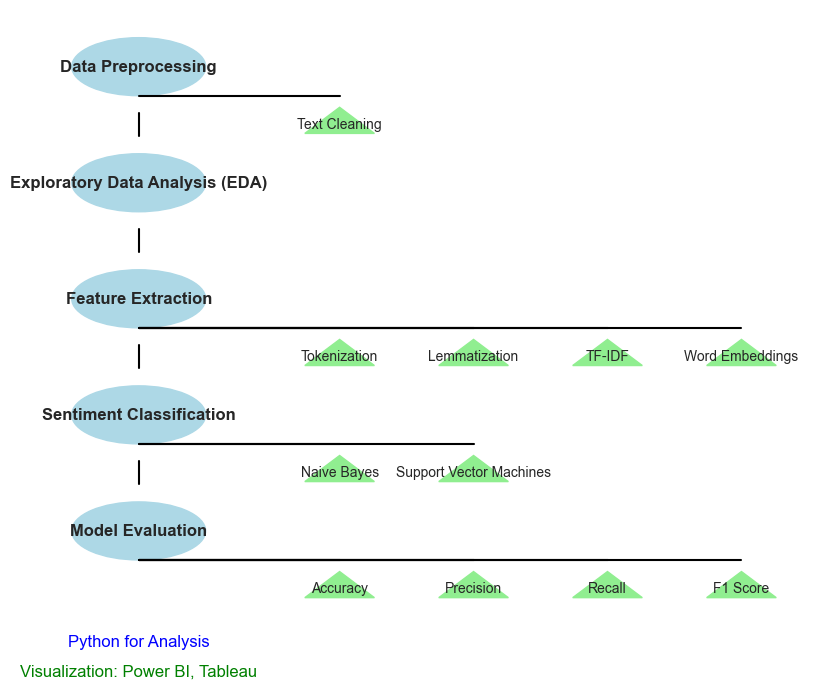

In [458]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def draw_simple_flowchart():
    fig, ax = plt.subplots(figsize=(10, 8))

    # Hide axes
    ax.axis('off')

    # Define stages and sub-stages
    stages = {
        "Data Preprocessing": ["Text Cleaning"],
        "Exploratory Data Analysis (EDA)": [],
        "Feature Extraction": ["Tokenization", "Lemmatization","TF-IDF", "Word Embeddings"],
        "Sentiment Classification": ["Naive Bayes", "Support Vector Machines"],
        "Model Evaluation": ["Accuracy", "Precision", "Recall", "F1 Score"]
    }

    # Positions
    pos = {
        "Data Preprocessing": (0.1, 0.9),
        "Exploratory Data Analysis (EDA)": (0.1, 0.7),
        "Feature Extraction": (0.1, 0.5),
        "Sentiment Classification": (0.1, 0.3),
        "Model Evaluation": (0.1, 0.1)
    }

    # Draw stages and connections
    for stage, sub_stages in stages.items():
        stage_pos = pos[stage]
        ax.add_patch(mpatches.Circle(stage_pos, 0.05, color='lightblue'))  # Draw stage circle
        ax.text(stage_pos[0], stage_pos[1], stage, ha='center', va='center', fontsize=12, weight='bold')
        
        for i, sub_stage in enumerate(sub_stages):
            sub_stage_pos = (stage_pos[0] + 0.15 + i*0.1, stage_pos[1] - 0.1)
            ax.add_patch(mpatches.RegularPolygon(sub_stage_pos, numVertices=3, radius=0.03, color='lightgreen'))  # Draw sub-stage triangle
            ax.text(sub_stage_pos[0], sub_stage_pos[1], sub_stage, ha='center', va='center', fontsize=10)
            
            # Draw connection lines
            ax.plot([stage_pos[0], sub_stage_pos[0]], [stage_pos[1]-0.05, sub_stage_pos[1]+0.05], color='black')

        if stage != "Model Evaluation":
            next_stage = list(stages.keys())[list(stages.keys()).index(stage) + 1]
            next_stage_pos = pos[next_stage]
            ax.plot([stage_pos[0], next_stage_pos[0]], [stage_pos[1]-0.08, next_stage_pos[1]+0.08], color='black')

    # Add Python and Visualization Tools
    ax.text(0.1, -0.1, "Python for Analysis", ha='center', fontsize=12, color='blue')
    ax.text(0.1, -0.15, "Visualization: Power BI, Tableau", ha='center', fontsize=12, color='green')

    plt.show()

# Call the function to draw the simple flowchart again for comparison
draw_simple_flowchart()



# EDA

In [385]:
#Categorize Sentiment review/Scores Positive Neutral Negative
#categorized scores into sentiment buckets like positive, neutral, and negative
import pandas as pd

# Assuming 'df' is your DataFrame and 'review/score' is your column with sentiment scores
# Define thresholds for sentiment categories
def categorize_sentiment(score):
    if score >= 4.0:
        return 'Positive'
    elif score >= 2.5:
        return 'Neutral'
    else:
        return 'Negative'

# Apply the function to your sentiment score column
sampled_df['sentiment_category'] = sampled_df['review/score'].apply(categorize_sentiment)


### 

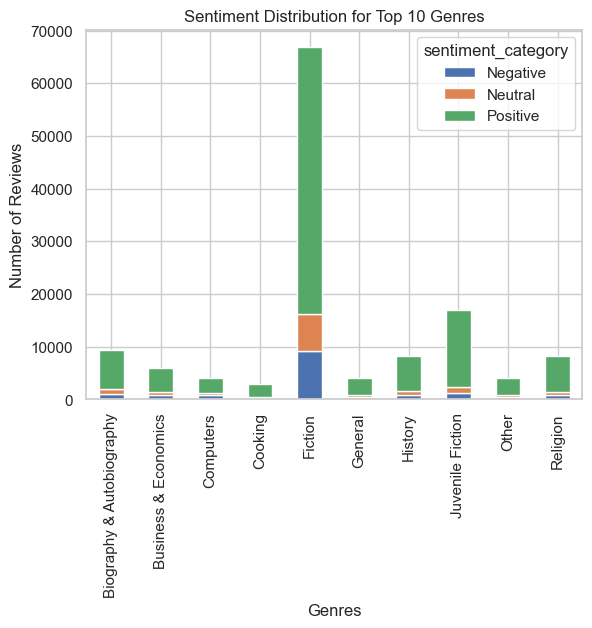

In [314]:
# Find the top 10 most common genres
top_genres = sampled_df['categories'].value_counts().head(10).index

# Filter the DataFrame to include only the top genres
top_genres_df = sampled_df[sampled_df['categories'].isin(top_genres)]

# Plot the distribution of sentiment categories within the top genres
pd.crosstab(top_genres_df['categories'], top_genres_df['sentiment_category']).plot(kind='bar', stacked=True)
plt.title('Sentiment Distribution for Top 10 Genres')
plt.xlabel('Genres')
plt.ylabel('Number of Reviews')
plt.show()


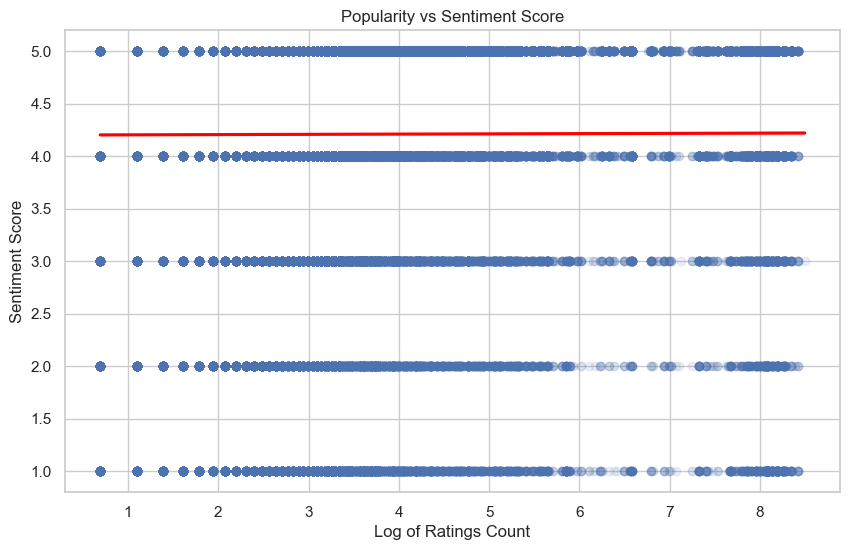

In [318]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'sampled_df' is your sampled DataFrame
# We'll add a small constant to avoid taking log of zero in case there are books with zero ratings
sampled_df['log_ratingsCount'] = np.log(sampled_df['ratingsCount'] + 1)

# Now we create a scatter plot
plt.figure(figsize=(10, 6))
sns.regplot(x='log_ratingsCount', y='review/score', data=sampled_df, scatter_kws={'alpha':0.1}, line_kws={'color':'red'})
plt.title('Popularity vs Sentiment Score')
plt.xlabel('Log of Ratings Count')
plt.ylabel('Sentiment Score')
plt.show()


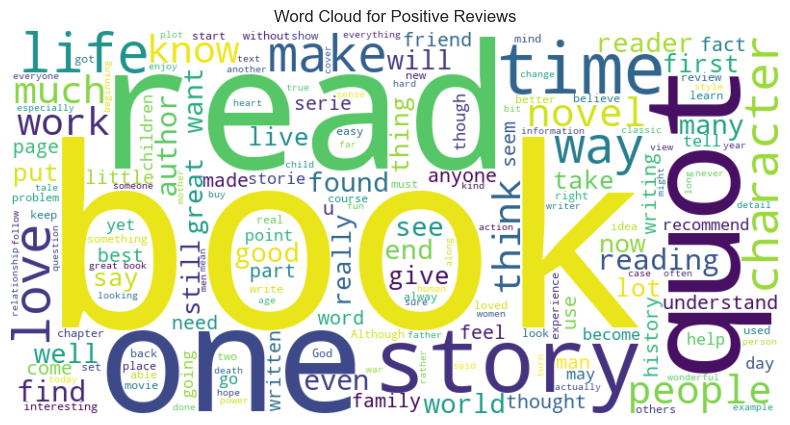

In [323]:

# i am creating Positive Reviews Word Cloud:

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Assuming 'sampled_df' is your sampled DataFrame
positive_reviews = ' '.join(sampled_df[sampled_df['sentiment_category'] == 'Positive']['review/text'])

# Create a word cloud for positive reviews
wordcloud_pos = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS, min_font_size=10).generate(positive_reviews)

# Display the word cloud for positive reviews
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Positive Reviews')
plt.show()


Text(0.5, 1.0, 'Word Cloud for Negative Reviews')

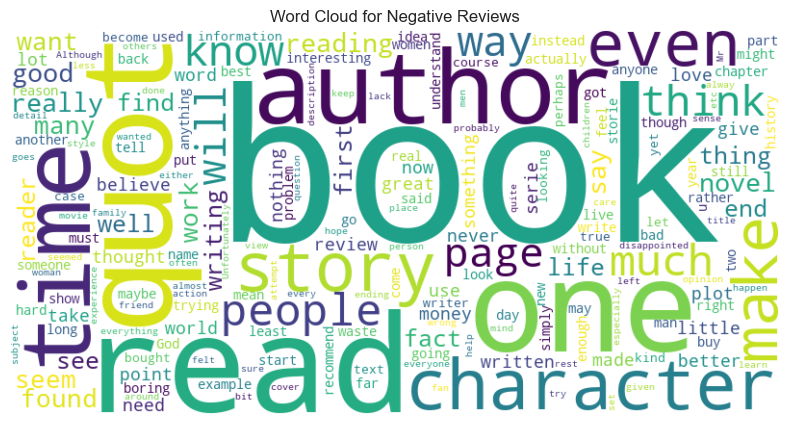

In [428]:
from wordcloud import WordCloud, STOPWORDS

# Assuming 'sampled_df' is your sampled DataFrame
negative_reviews = ' '.join(sampled_df[sampled_df['sentiment_category'] == 'Negative']['review/text'])

# Create a word cloud for negative reviews
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS, min_font_size=10).generate(negative_reviews)

# Display the word cloud for negative reviews
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Negative Reviews')



In [316]:
sampled_df.head()

,Title,description,authors,ratingsCount,review/score,review/summary,review/text,categories,tokenized_review,sentiment_category
2200108,Sacred Path Cards: The Discovery of Self Throu...,This extraordinary tool for self-discovery dra...,Jamie Sams,2.0,4.0,I regularly use the cards and read the book an...,The book and the cards have definately changed...,"Body, Mind & Spirit","[book, card, definately, change, live, life, u...",Positive
86878,Lord of the flies,William Golding’s unforgettable classic of boy...,William Golding,2861.0,5.0,Lord of the Flies,This book was written excellentally by Golding...,Fiction,"[book, write, excellentally, golding, express,...",Positive
1837261,Lord of the Flies,William Golding’s unforgettable classic of boy...,William Golding,2861.0,4.0,Lord of the flies,The Lord of the flies takes you on a realistic...,Fiction,"[lord, fly, take, realistic, journy, story, st...",Positive
197958,The doomsters,"Hired by Carl Hallman, the desperate-eyed junk...",Ross Macdonald,3.0,5.0,Both a good puzzler and good though tragic drama,I don't know why the heck it took me so long t...,Fiction,"[know, heck, take, long, discover, ross, macdo...",Positive
139049,"The Hobbitt, or there and back again; illustra...","Bilbo Baggins, a respectable, well-to-do hobbi...",J. R. R. Tolkien,9.0,5.0,Classic,This book is a timeless classic that is and wi...,Fiction,"[book, timeless, classic, continue, enjoy, gen...",Positive


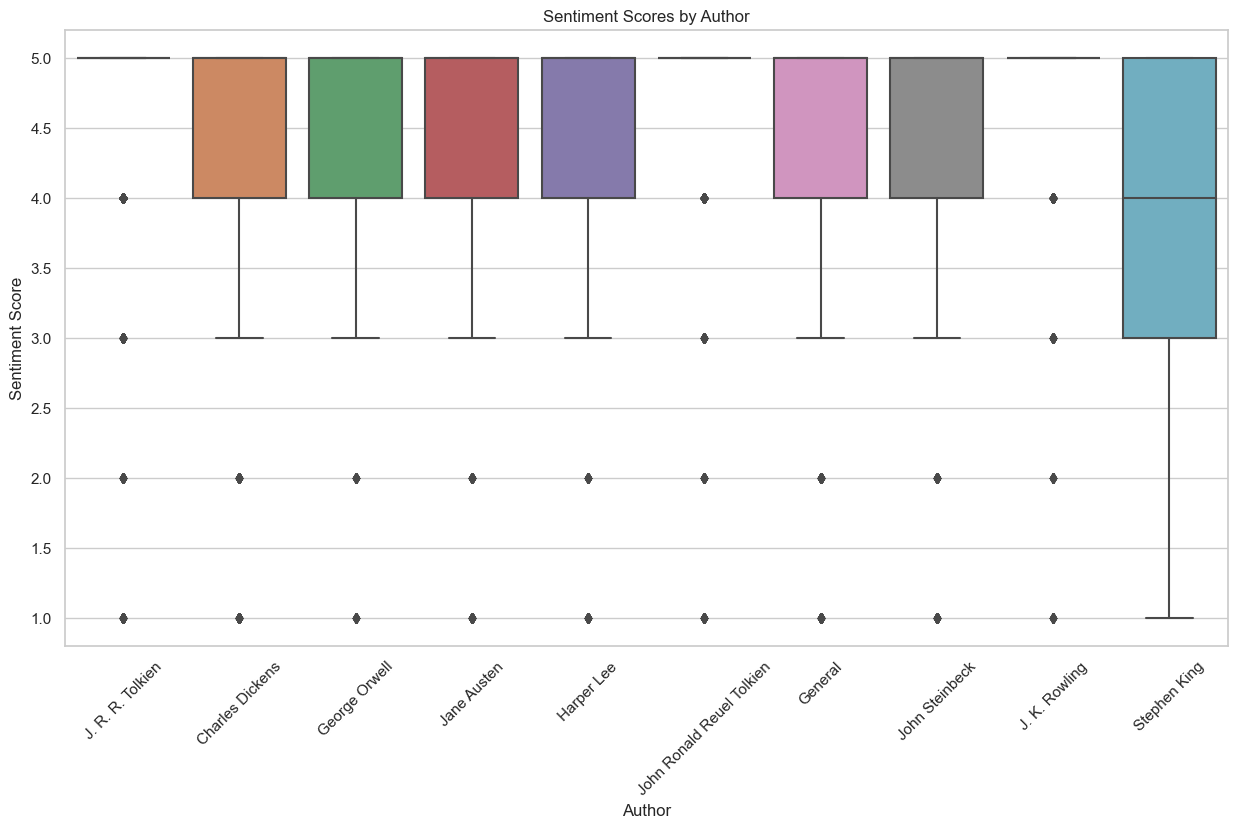

In [327]:
# You may need to limit the number of authors if there are too many to display effectively
top_authors = sampled_df['authors'].value_counts().head(10).index

# Filter the DataFrame to include only the top authors
top_authors_df = sampled_df[sampled_df['authors'].isin(top_authors)]

# Create box plots for sentiment scores across the top authors
plt.figure(figsize=(15, 8))
sns.boxplot(x='authors', y='review/score', data=top_authors_df)
plt.xticks(rotation=45)
plt.title('Sentiment Scores by Author')
plt.xlabel('Author')
plt.ylabel('Sentiment Score')
plt.show()


In [328]:
print(sampled_df[['ratingsCount', 'review/score']].describe())
print(sampled_df[['ratingsCount', 'review/score']].corr())


        ratingsCount   review/score
count  204727.000000  204727.000000
mean      149.965329       4.207071
std       600.778609       1.211205
min         1.000000       1.000000
25%         5.000000       4.000000
50%         9.000000       5.000000
75%        19.000000       5.000000
max      4895.000000       5.000000
              ratingsCount  review/score
ratingsCount      1.000000      0.000625
review/score      0.000625      1.000000


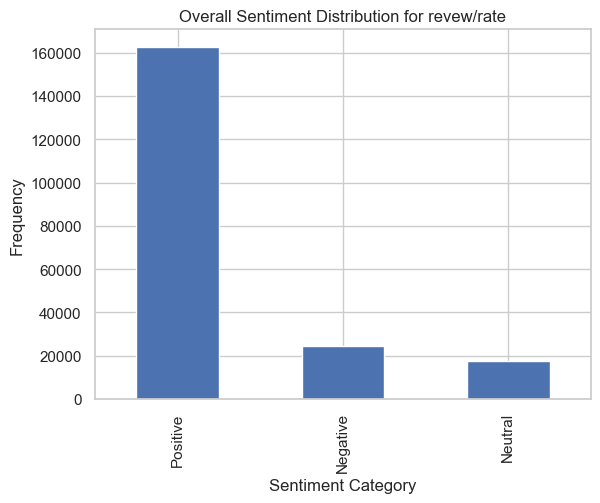

In [330]:
sampled_df['sentiment_category'].value_counts().plot(kind='bar')
plt.title('Overall Sentiment Distribution for revew/rate')
plt.xlabel('Sentiment Category')
plt.ylabel('Frequency')
plt.show()


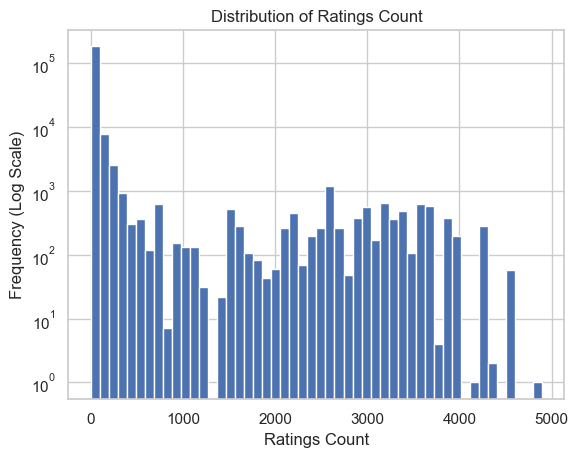

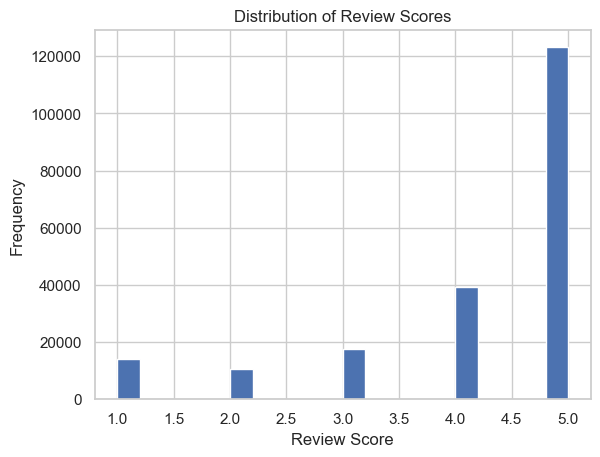

In [331]:
sampled_df['ratingsCount'].plot(kind='hist', bins=50, logy=True)
plt.title('Distribution of Ratings Count')
plt.xlabel('Ratings Count')
plt.ylabel('Frequency (Log Scale)')
plt.show()

sampled_df['review/score'].plot(kind='hist', bins=20)
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.show()


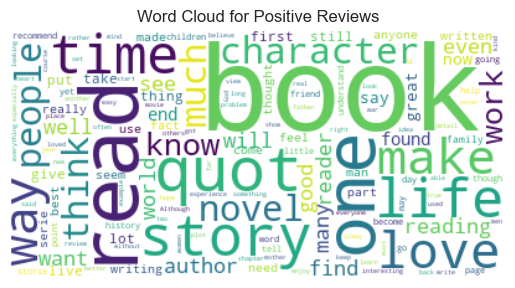

In [332]:
from wordcloud import WordCloud

# Generate a word cloud image for positive sentiment reviews
positive_reviews = ' '.join(sampled_df[sampled_df['sentiment_category'] == 'Positive']['review/text'])
wordcloud_pos = WordCloud(background_color="white").generate(positive_reviews)

plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Positive Reviews')
plt.show()


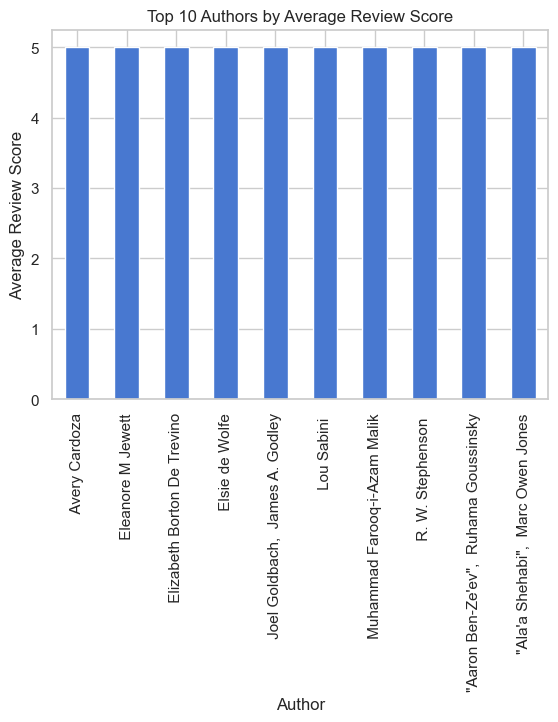

In [421]:
authors_sentiment = sampled_df.groupby('authors')['review/score'].mean().nlargest(10)
authors_sentiment.plot(kind='bar')
plt.title('Top 10 Authors by Average Review Score')
plt.xlabel('Author') 
plt.ylabel('Average Review Score')
plt.show()


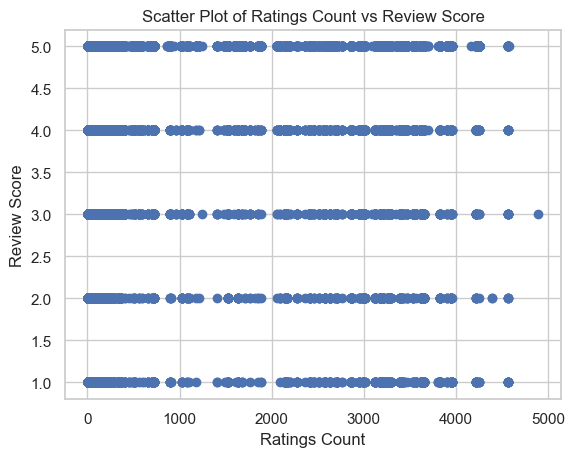

In [334]:
import matplotlib.pyplot as plt

# Assuming 'ratingsCount' and 'review/score' are columns in your DataFrame
plt.scatter(sampled_df['ratingsCount'], sampled_df['review/score'])
plt.xlabel('Ratings Count')
plt.ylabel('Review Score')
plt.title('Scatter Plot of Ratings Count vs Review Score')
plt.show()


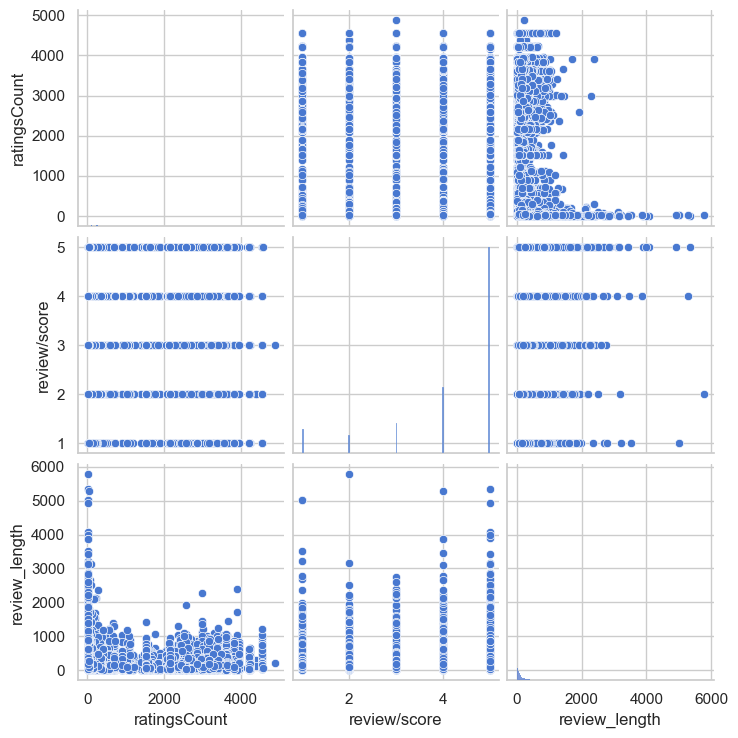

In [425]:
#"pair plot visualization for "pair plot visualization
sns.pairplot(sampled_df)
plt.show()





###  bivariate analysis and multivariate analysis

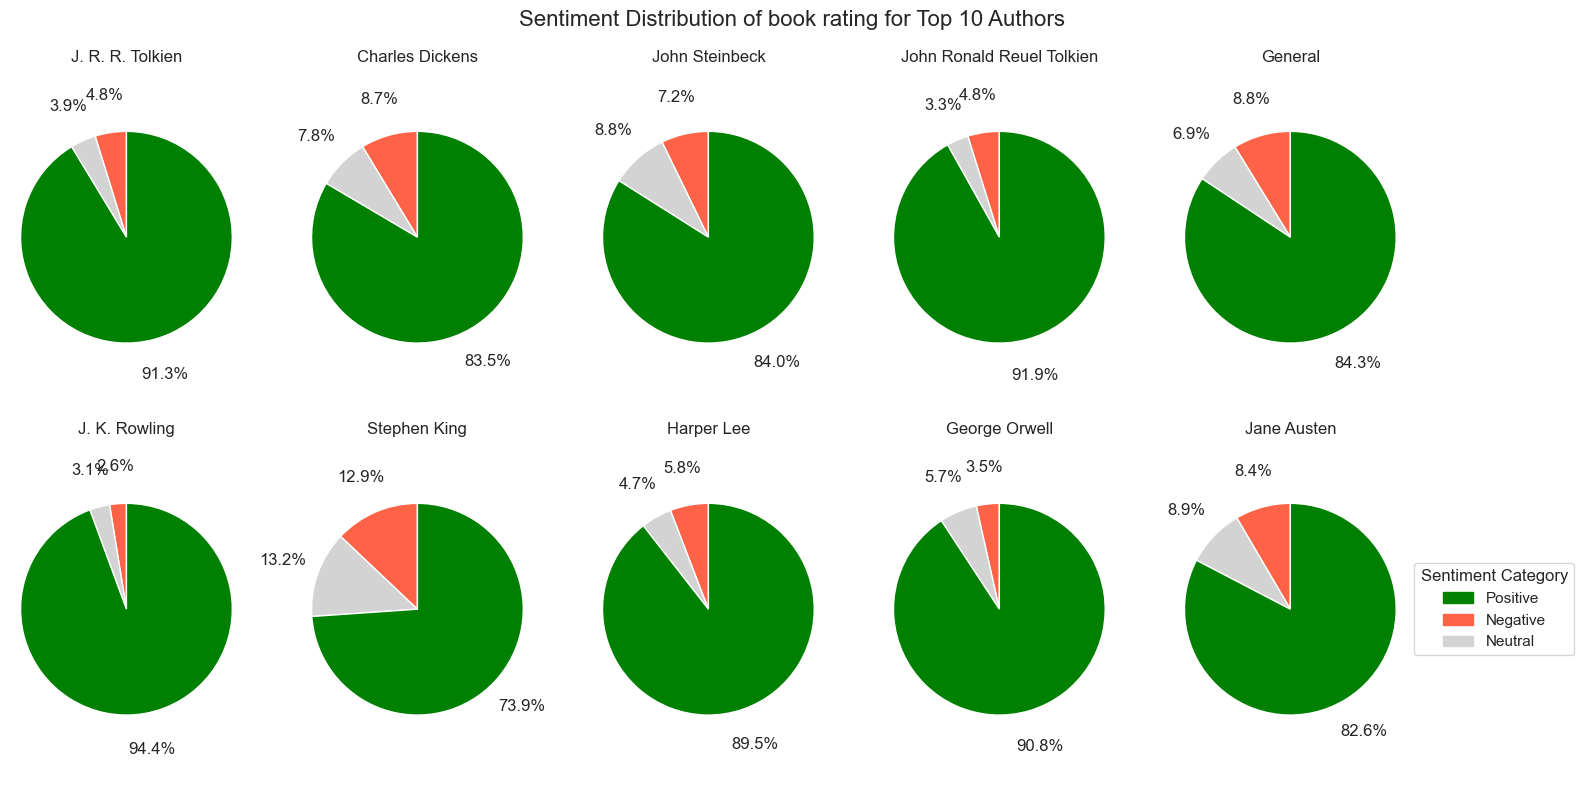

In [426]:
#Sentiment Distribution of book rating for Top 10 Authors

author_sentiment_counts = sampled_df.groupby(['authors', 'sentiment_category']).size().unstack(fill_value=0)

top_10_authors = author_sentiment_counts.sum(axis=1).nlargest(10).index

colors = {'Positive': 'green', 'Negative': 'tomato', 'Neutral': 'lightgray'}
 
fig, axs = plt.subplots(2, 5, figsize=(16, 8), squeeze=False)   
 
axs = axs.flatten()
 
for i, author in enumerate(top_10_authors):
    sentiment_counts = author_sentiment_counts.loc[author]
    pie = axs[i].pie(sentiment_counts, colors=[colors.get(label, 'black') for label in sentiment_counts.index], labels=None, startangle=90, autopct='%1.1f%%', pctdistance=1.35)  
    axs[i].set_title(author)
    axs[i].axis('equal')   

legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors.values()]
plt.legend(legend_handles, colors.keys(), loc='center left', bbox_to_anchor=(1, 0.5), title='Sentiment Category')

plt.suptitle('Sentiment Distribution of book rating for Top 10 Authors', fontsize=16)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

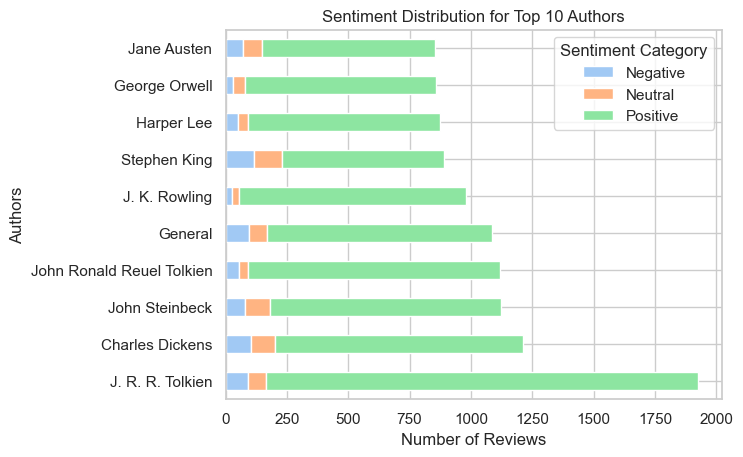

In [367]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the data to get sentiment counts for each author
sentiment_counts = sampled_df.groupby(['authors', 'sentiment_category']).size().unstack(fill_value=0)

# Determine top 10 authors based on the number of reviews
top_10_authors = sentiment_counts.sum(axis=1).nlargest(10).index

# Filter data for top 10 authors
sentiment_counts_top_10 = sentiment_counts.loc[top_10_authors]

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
sns.set_palette("pastel")  # Set color palette
sentiment_counts_top_10.plot(kind='barh', stacked=True)
plt.title('Sentiment Distribution for Top 10 Authors')
plt.xlabel('Number of Reviews')
plt.ylabel('Authors')
plt.legend(title='Sentiment Category')
plt.show()


<Figure size 1400x800 with 0 Axes>

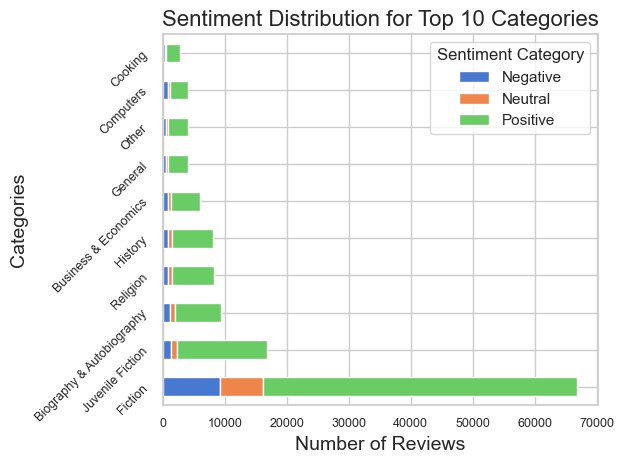

In [388]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'sampled_df' is your DataFrame and it's already been imported.

# Pivot the data to get sentiment counts for each category
sentiment_counts = sampled_df.groupby(['categories', 'sentiment_category']).size().unstack(fill_value=0)

# Determine top 10 categories based on the number of reviews
top_10_categories = sentiment_counts.sum(axis=1).nlargest(10).index

# Filter data for top 10 categories
sentiment_counts_top_10 = sentiment_counts.loc[top_10_categories]

# Increase figure size and decrease font size for better readability
plt.figure(figsize=(14, 8))
sns.set_palette("muted")  # Set color palette

# Plot horizontal bar chart
sentiment_counts_top_10.plot(kind='barh', stacked=True, fontsize=9)  # Decrease font size further

plt.title('Sentiment Distribution for Top 10 Categories', fontsize=16)
plt.xlabel('Number of Reviews', fontsize=14)
plt.ylabel('Categories', fontsize=14)
plt.legend(title='Sentiment Category', fontsize=11)

# If the text is still overlapping, you can rotate the category labels
plt.yticks(rotation=45)  # Rotate labels

plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()


Text(0.5, 0.98, 'Sentiment Distribution of book rating for Top 10 Categories')

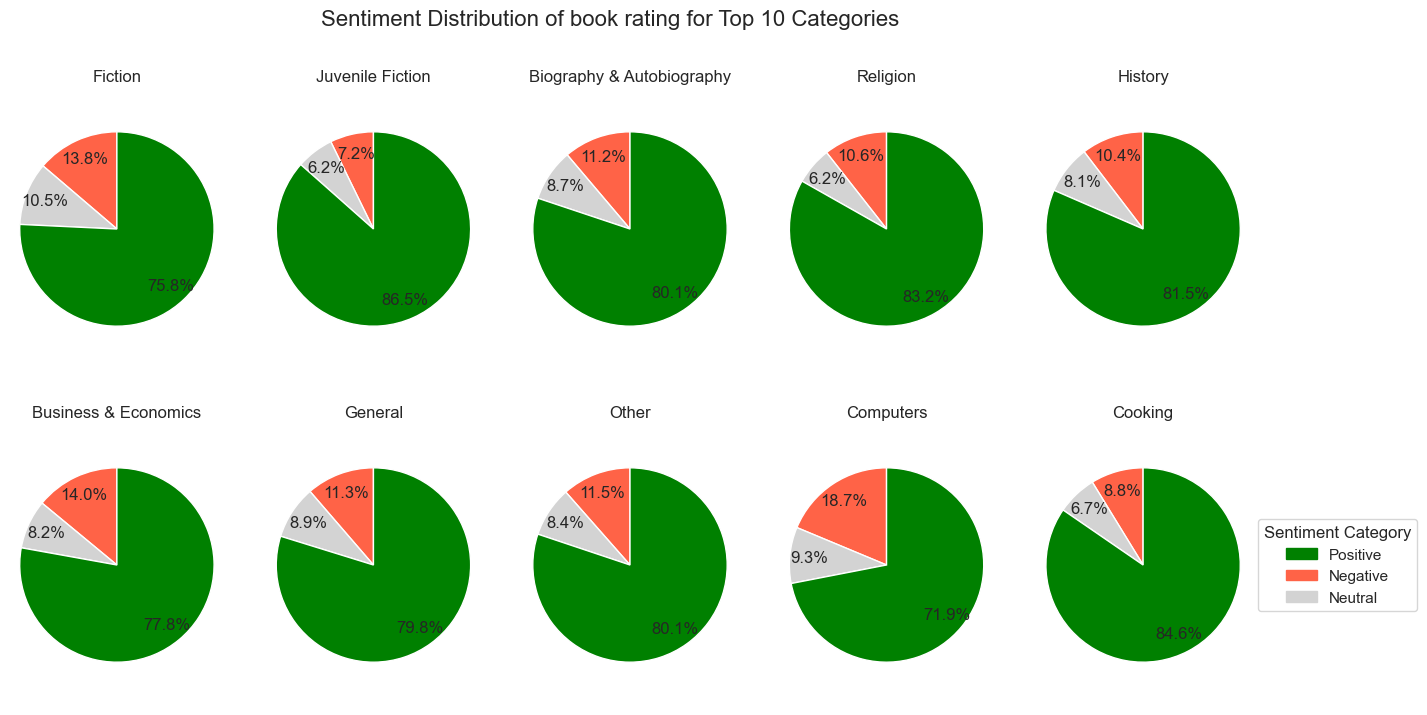

In [436]:
category_sentiment_counts = sampled_df.groupby(['categories', 'sentiment_category']).size().unstack(fill_value=0)
top_10_categories = category_sentiment_counts.sum(axis=1).nlargest(10).index

colors = {'Positive': 'green', 'Negative': 'tomato', 'Neutral': 'lightgray'}

fig, axs = plt.subplots(2, 5, figsize=(16, 8), squeeze=False)
axs = axs.flatten()


for i, category in enumerate(top_10_categories):
    sentiment_counts = category_sentiment_counts.loc[category]
    pie = axs[i].pie(sentiment_counts, colors=[colors.get(label, 'black') for label in sentiment_counts.index], labels=None, startangle=90, autopct='%1.1f%%', pctdistance=0.80)
    axs[i].set_title(category)
    axs[i].axis('equal')

legend_handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors.values()]
plt.legend(legend_handles, colors.keys(), loc='center left', bbox_to_anchor=(1, 0.5), title='Sentiment Category')

plt.suptitle('Sentiment Distribution of book rating for Top 10 Categories', fontsize=16)



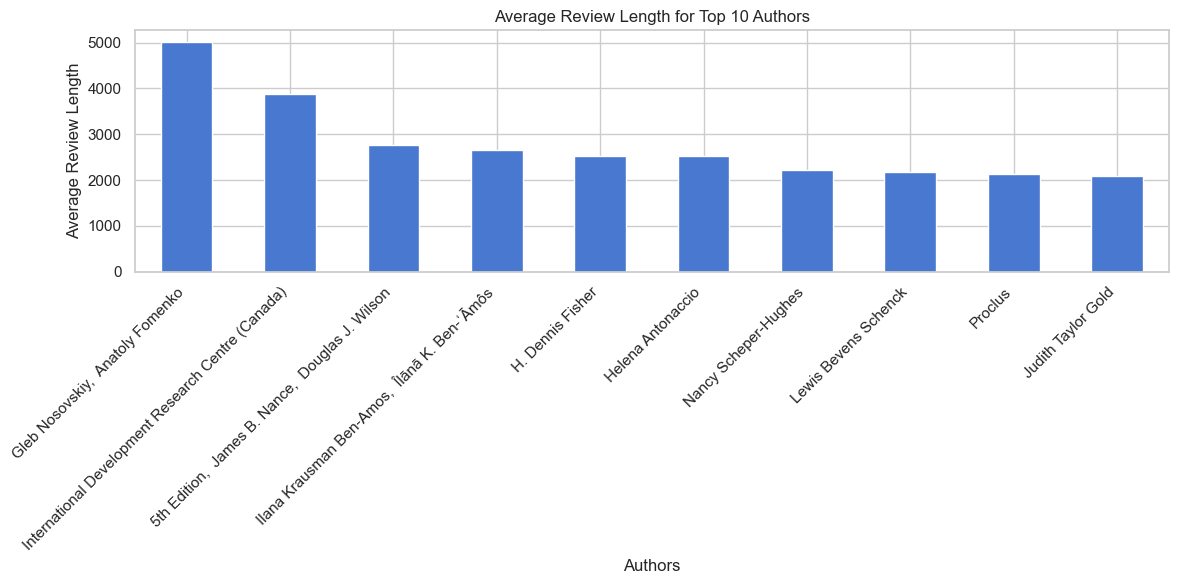

In [389]:
# Calculate the average review/textlength of each review and creating new attribute for it then
# visualize the Average Review Length for Top 10 Authors

sampled_df['review_length'] = sampled_df['review/text'].apply(lambda x: len(x.split()))

author_avg_review_length = sampled_df.groupby('authors')['review_length'].mean().sort_values(ascending=False)

top_10_authors = author_avg_review_length.head(10)

top_10_authors.plot(kind='bar', figsize=(12, 6))
plt.title('Average Review Length for Top 10 Authors')
plt.xlabel('Authors')
plt.ylabel('Average Review Length')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [437]:
sampled_df.head()

,Title,description,authors,ratingsCount,review/score,review/summary,review/text,categories,tokenized_review,sentiment_category,review_length
0,Sacred Path Cards: The Discovery of Self Throu...,This extraordinary tool for self-discovery dra...,Jamie Sams,2.0,4.0,I regularly use the cards and read the book an...,The book and the cards have definately changed...,"Body, Mind & Spirit","['book', 'cards', 'definately', 'changed', 'li...",Positive,51
1,Lord of the flies,William Golding’s unforgettable classic of boy...,William Golding,2861.0,5.0,Lord of the Flies,This book was written excellentally by Golding...,Fiction,"['book', 'written', 'excellentally', 'Golding'...",Positive,37
2,Lord of the Flies,William Golding’s unforgettable classic of boy...,William Golding,2861.0,4.0,Lord of the flies,The Lord of the flies takes you on a realistic...,Fiction,"['Lord', 'flies', 'takes', 'realistic', 'journ...",Positive,86
3,The doomsters,"Hired by Carl Hallman, the desperate-eyed junk...",Ross Macdonald,3.0,5.0,Both a good puzzler and good though tragic drama,I don't know why the heck it took me so long t...,Fiction,"['know', 'heck', 'took', 'long', 'discover', '...",Positive,167
4,"The Hobbitt, or there and back again; illustra...","Bilbo Baggins, a respectable, well-to-do hobbi...",J. R. R. Tolkien,9.0,5.0,Classic,This book is a timeless classic that is and wi...,Fiction,"['book', 'timeless', 'classic', 'continue', 'e...",Positive,26


In [441]:
# Find the highest ratingsCount
highest_ratings_count = sampled_df['ratingsCount'].max()

# Find the lowest ratingsCount
lowest_ratings_count = sampled_df['ratingsCount'].min()

print("Highest ratingsCount:", highest_ratings_count)
print("Lowest ratingsCount:", lowest_ratings_count)


Highest ratingsCount: 4895.0
Lowest ratingsCount: 1.0


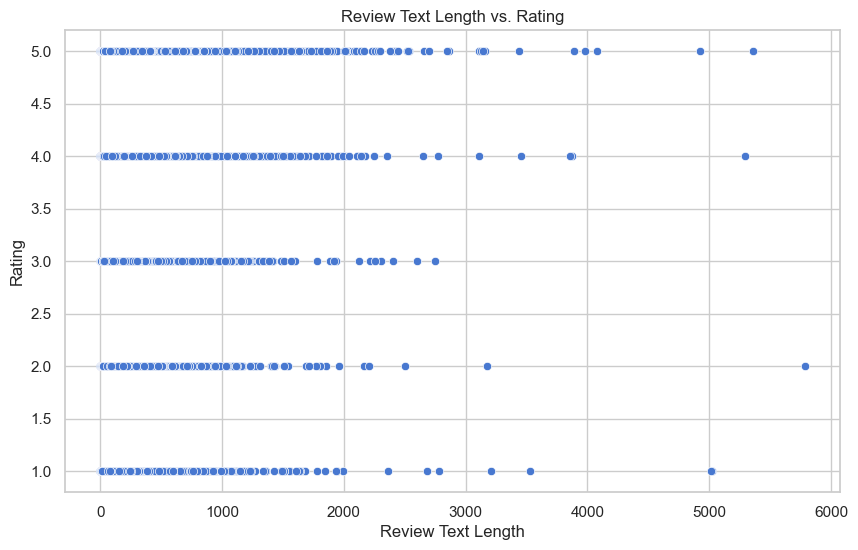

Correlation coefficient: -0.055603010745443764


In [390]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'sampled_df' is your DataFrame
# and it now includes a 'review_length' column alongside 'review/score'

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_length', y='review/score', data=sampled_df)
plt.title('Review Text Length vs. Rating')
plt.xlabel('Review Text Length')
plt.ylabel('Rating')
plt.show()

# Calculating and printing the correlation coefficient
correlation = sampled_df[['review_length', 'review/score']].corr().iloc[0, 1]
print(f"Correlation coefficient: {correlation}")


# new analysis

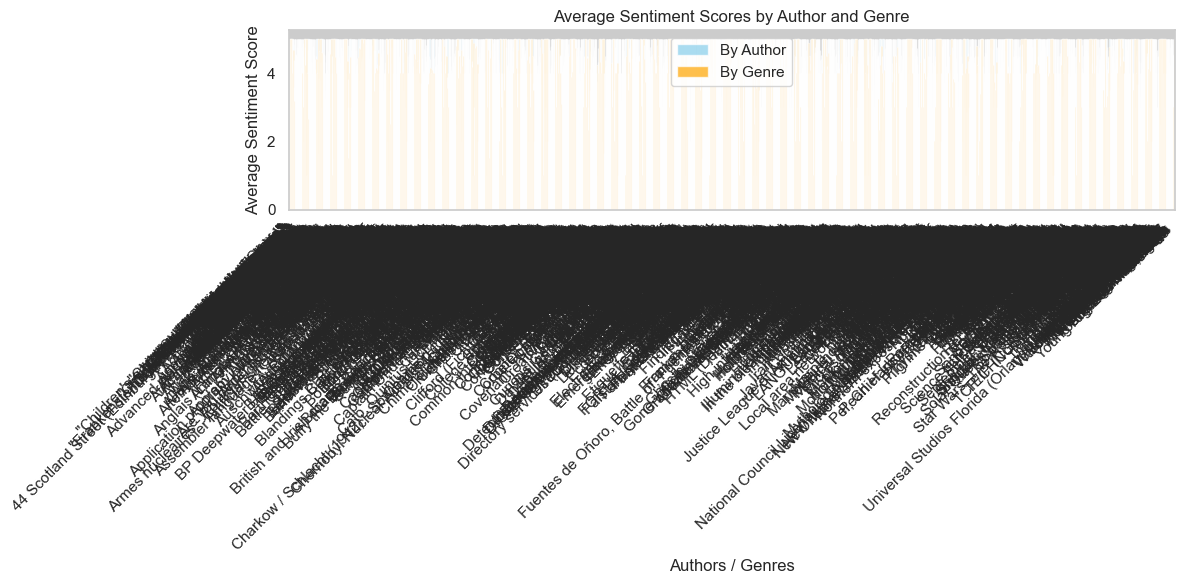

In [391]:
# Group by author and calculate the average sentiment score for each author
author_sentiment_scores = sampled_df.groupby('authors')['review/score'].mean()

# Group by genre and calculate the average sentiment score for each genre
genre_sentiment_scores = sampled_df.groupby('categories')['review/score'].mean()

# Compare the average sentiment scores between authors and genres
# You can use visualization techniques like bar plots or box plots for comparison
# For example:
plt.figure(figsize=(12, 6))
author_sentiment_scores.plot(kind='bar', color='skyblue', alpha=0.7, label='By Author')
genre_sentiment_scores.plot(kind='bar', color='orange', alpha=0.7, label='By Genre')
plt.title('Average Sentiment Scores by Author and Genre')
plt.xlabel('Authors / Genres')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


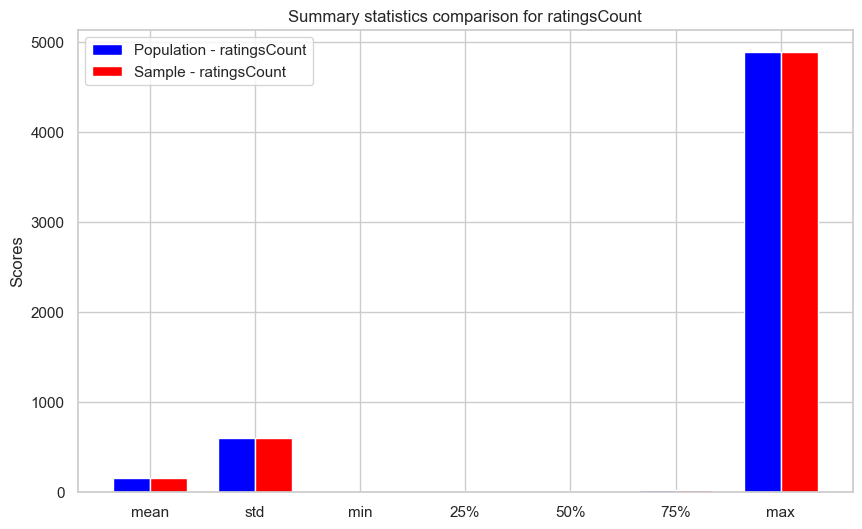

In [403]:


# Compute summary statistics for 'ratingsCount' for both datasets original and sampled 
population_summary_stats = relevant_attributes['ratingsCount'].describe()
sample_summary_stats = sampled_df['ratingsCount'].describe()

fig, ax = plt.subplots(figsize=(10, 6))   

rects1 = ax.bar(x - width/2, population_vals, width, label='Population - ratingsCount', color='blue')
rects2 = ax.bar(x + width/2, sample_vals, width, label='Sample - ratingsCount', color='red')

ax.set_ylabel('Scores')
ax.set_title('Summary statistics comparison for ratingsCount')
ax.set_xticks(x)
ax.set_xticklabels(stats)
ax.legend()

plt.show()


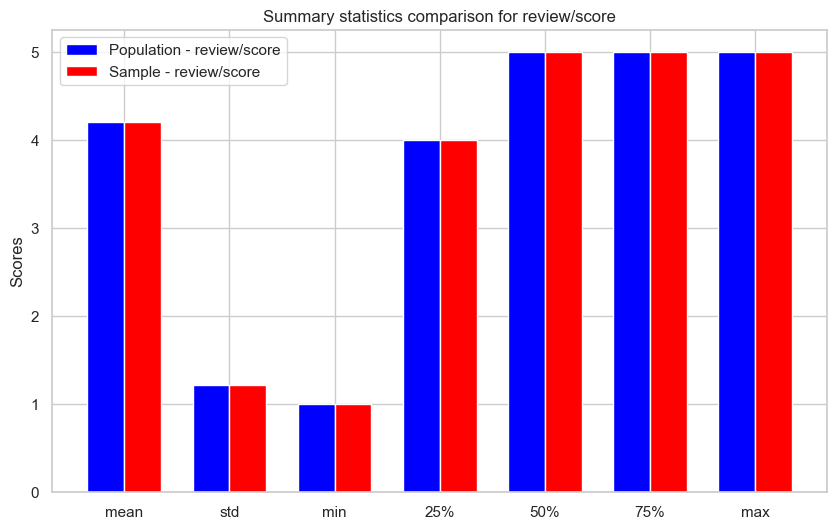

In [413]:

# Assuming relevant_attributes and sampled_df are pandas DataFrames.

# Compute summary statistics for 'review/score' for both datasets
population_summary_stats = relevant_attributes['review/score'].describe()
sample_summary_stats = sampled_df['review/score'].describe()



fig, ax = plt.subplots(figsize=(10, 6))  # Create 1 plot


# Plotting for 'review/score'
rects1 = ax.bar(x - width/2, population_vals, width, label='Population - review/score', color='blue')
rects2 = ax.bar(x + width/2, sample_vals, width, label='Sample - review/score', color='red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Summary statistics comparison for review/score')
ax.set_xticks(x)
ax.set_xticklabels(stats)
ax.legend()

plt.show()
